In [1]:
%pylab inline
from numba import jit,njit
from scipy.fft import *
import scipy 
import seaborn as sns
from scipy.integrate import solve_ivp #for vector forms
from scipy import integrate
import seaborn as sns
import ipywidgets as ipw
import pickle
sns.set()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
class OscillatorSimulator:
    def __init__(self, t,w_2, g, A, w,n_A):
        self.t = t
        self.w_2 = w_2
        self.g = g
        self.A = A
        self.w = w
        self.n_A = n_A

    @staticmethod
    
    def noise_gauss():
        return normal(0, 1)

    @staticmethod
    
    def white_noise_uniform():
        return uniform(0, 1)

    @staticmethod
    
    def pink_noise():
        coef1 = [0.09922035, -0.095993537, 0.050612699, -0.004408786]
        coef2 = [1, -2.494956002, 2.017265875, -0.522189400]

        pink_noise = uniform(0, 1)
        pink_noise = convolve(pink_noise, coef1)
        pink_noise = convolve(pink_noise, coef2, mode='valid')
        return pink_noise / 0.091420942
    
#clear oscillators
    @jit(forceobj=True)
    def harmonic(self, t, u):
        #eta = self.n_A * self.noise_gauss()
        sol_har = [u[1], -self.w_2 * u[0] ]
        return sol_har

    @jit(forceobj=True)
    def damped(self, t, u):
        #eta = self.n_A *  self.noise_gauss()
        sol_dam = [u[1], (-self.g * u[1] - self.w_2 * u[0]) ]
        return sol_dam

    @jit(forceobj=True)
    def driven(self, t, u):
        #eta = self.n_A *  self.noise_gauss()
        sol_driv = [u[1], self.A * cos(self.w * t) - self.g * u[1] - self.w_2 * u[0] ]
        return sol_driv
       
    
#gauss/normal distribution
    @jit(forceobj=True)
    def harmonic_oscillator(self, t, u):
        eta = self.n_A * self.noise_gauss()
        sol_har = [u[1], -self.w_2 * u[0] + eta]
        return sol_har

    @jit(forceobj=True)
    def damped_oscillator(self, t, u):
        eta = self.n_A *  self.noise_gauss()
        sol_dam = [u[1], (-self.g * u[1] - self.w_2 * u[0]) + eta]
        return sol_dam

    @jit(forceobj=True)
    def driven_oscillator(self, t, u):
        eta = self.n_A *  self.noise_gauss()
        sol_driv = [u[1], self.A * cos(self.w * t) - self.g * u[1] - self.w_2 * u[0] + eta]
        return sol_driv
    
#white noise / uniform distribution
    @jit(forceobj=True)
    def harmonic_oscillator_white(self, t, u):
        eta = self.n_A * self.white_noise_uniform()
        sol_har = [u[1], -self.w_2 * u[0] + eta]
        return sol_har

    @jit(forceobj=True)
    def damped_oscillator_white(self, t, u):
        eta = self.n_A * self.white_noise_uniform()
        sol_dam = [u[1], (-self.g * u[1] - self.w_2 * u[0]) + eta]
        return sol_dam

    @jit(forceobj=True)
    def driven_oscillator_white(self, t, u):
        eta = self.n_A * self.white_noise_uniform()
        sol_driv = [u[1], self.A * cos(self.w * t) - self.g * u[1] - self.w_2 * u[0] + eta]
        return sol_driv        

#pink/ f^{-1} noise

    @jit(forceobj=True)
    def harmonic_oscillator_pink(self, t, u):
        eta = self.n_A * self.pink_noise()
        sol_har = [u[1], -self.w_2 * u[0] + eta]
        return sol_har

    @jit(forceobj=True)
    def damped_oscillator_pink(self, t, u):
        eta = self.n_A * self.pink_noise()
        sol_dam = [u[1], (-self.g * u[1] - self.w_2 * u[0]) + eta]
        return sol_dam

    @jit(forceobj=True)
    def driven_oscillator_pink(self, t, u):
        eta = self.n_A * self.pink_noise()
        sol_driv = [u[1], self.A * cos(self.w * t) - self.g * u[1] - self.w_2 * u[0] + eta]
        return sol_driv

#simulator5 = OscillatorSimulator(t,w_2=2.25, g=.05, A=1, w=1,n_A=1)
#simulator6 = OscillatorSimulator(t,w_2=0.25, g=1.5, A=5, w=pi,n_A=2.2)
#simulator7 = OscillatorSimulator(t,w_2=10.5, g=.75, A=2, w=0.2,n_A=1.8)

In [3]:
with open('sol_h5.pkl', 'rb') as f:
    sol_h5 = pickle.load(f)
with open('sol_d5.pkl', 'rb') as f:
    sol_d5 = pickle.load(f)
with open('sol_dr5.pkl', 'rb') as f:
    sol_dr5 = pickle.load(f)
with open('sol_h_g5.pkl', 'rb') as f:
    sol_h_g5 = pickle.load(f)
with open('sol_d_g5.pkl', 'rb') as f:
    sol_d_g5 = pickle.load(f)
with open('sol_dr_g5.pkl', 'rb') as f:
    sol_dr_g5 = pickle.load(f)
with open('sol_h_p5.pkl', 'rb') as f:
    sol_h_p5 = pickle.load(f)
with open('sol_d_p5.pkl', 'rb') as f:
    sol_d_p5 = pickle.load(f)
with open('sol_dr_p5.pkl', 'rb') as f:
    sol_dr_p5 = pickle.load(f)
    
with open('sol_h6.pkl', 'rb') as f:
    sol_h6 = pickle.load(f)
with open('sol_d6.pkl', 'rb') as f:
    sol_d6 = pickle.load(f)
with open('sol_dr6.pkl', 'rb') as f:
    sol_dr6 = pickle.load(f)
with open('sol_h_g6.pkl', 'rb') as f:
    sol_h_g6 = pickle.load(f)
with open('sol_d_g6.pkl', 'rb') as f:
    sol_d_g6 = pickle.load(f)
with open('sol_dr_g6.pkl', 'rb') as f:
    sol_dr_g6 = pickle.load(f)
with open('sol_h_p6.pkl', 'rb') as f:
    sol_h_p6 = pickle.load(f)
with open('sol_d_p6.pkl', 'rb') as f:
    sol_d_p6 = pickle.load(f)
with open('sol_dr_p6.pkl', 'rb') as f:
    sol_dr_p6 = pickle.load(f)
    
with open('sol_h7.pkl', 'rb') as f:
    sol_h7 = pickle.load(f)
with open('sol_d7.pkl', 'rb') as f:
    sol_d7 = pickle.load(f)
with open('sol_dr7.pkl', 'rb') as f:
    sol_dr7 = pickle.load(f)
with open('sol_h_g7.pkl', 'rb') as f:
    sol_h_g7 = pickle.load(f)
with open('sol_d_g7.pkl', 'rb') as f:
    sol_d_g7 = pickle.load(f)
with open('sol_dr_g7.pkl', 'rb') as f:
    sol_dr_g7 = pickle.load(f)
with open('sol_h_p7.pkl', 'rb') as f:
    sol_h_p7 = pickle.load(f)
with open('sol_d_p7.pkl', 'rb') as f:
    sol_d_p7 = pickle.load(f)
with open('sol_dr_p7.pkl', 'rb') as f:
    sol_dr_p7 = pickle.load(f)
    
with open('clear_h7.pkl', 'rb') as f:
    clear_h7 = pickle.load(f)
with open('clear_d7.pkl', 'rb') as f:
    clear_d7 = pickle.load(f)
with open('clear_dr7.pkl', 'rb') as f:
    clear_dr7 = pickle.load(f)
with open('clear_h6.pkl', 'rb') as f:
    clear_h6 = pickle.load(f)
with open('clear_d6.pkl', 'rb') as f:
    clear_d6 = pickle.load(f)
with open('clear_dr6.pkl', 'rb') as f:
    clear_dr6 = pickle.load(f)
with open('clear_h5.pkl', 'rb') as f:
    clear_h5 = pickle.load(f)
with open('clear_d5.pkl', 'rb') as f:
    clear_d5 = pickle.load(f)
with open('clear_dr5.pkl', 'rb') as f:
    clear_dr5 = pickle.load(f)

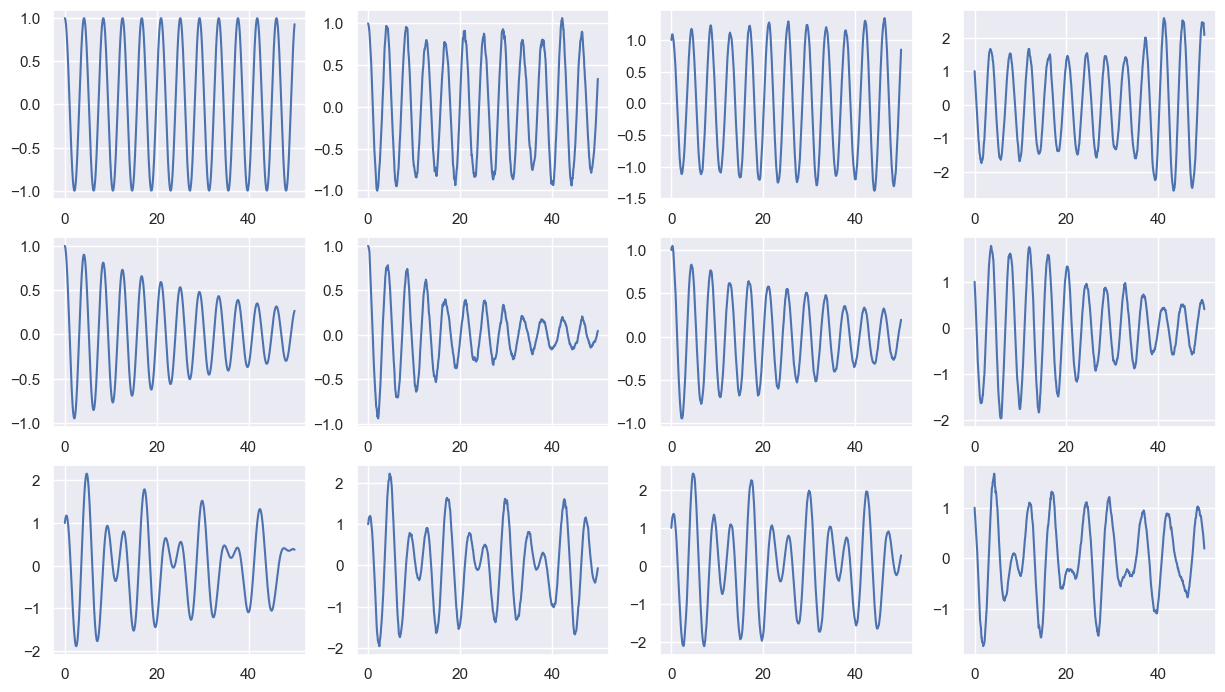

In [4]:
fig = plt.figure(figsize = (15,35))

ax = fig.add_subplot(12,4,1);plt.plot(clear_h5.t,clear_h5.y[1])
ax = fig.add_subplot(12,4,2);plt.plot(sol_h5.t,sol_h5.y[1])
ax = fig.add_subplot(12,4,3);plt.plot(sol_h_g5.t,sol_h_g5.y[1])
ax = fig.add_subplot(12,4,4);plt.plot(sol_h_p5.t,sol_h_p5.y[1])

ax = fig.add_subplot(12,4,5);plt.plot(clear_d5.t,clear_d5.y[1])
ax = fig.add_subplot(12,4,6);plt.plot(sol_d5.t,sol_d5.y[1])
ax = fig.add_subplot(12,4,7);plt.plot(sol_d_g5.t,sol_d_g5.y[1])
ax = fig.add_subplot(12,4,8);plt.plot(sol_d_p5.t,sol_d_p5.y[1])

ax = fig.add_subplot(12,4,9);plt.plot(clear_dr5.t,clear_dr5.y[1])
ax = fig.add_subplot(12,4,10);plt.plot(sol_dr5.t,sol_dr5.y[1])
ax = fig.add_subplot(12,4,11);plt.plot(sol_dr_g5.t,sol_dr_g5.y[1])
ax = fig.add_subplot(12,4,12);plt.plot(sol_dr_p5.t,sol_dr_p5.y[1])

plt.savefig('pics/osc_1.png', dpi=900, bbox_inches = 'tight',
    pad_inches = 1)


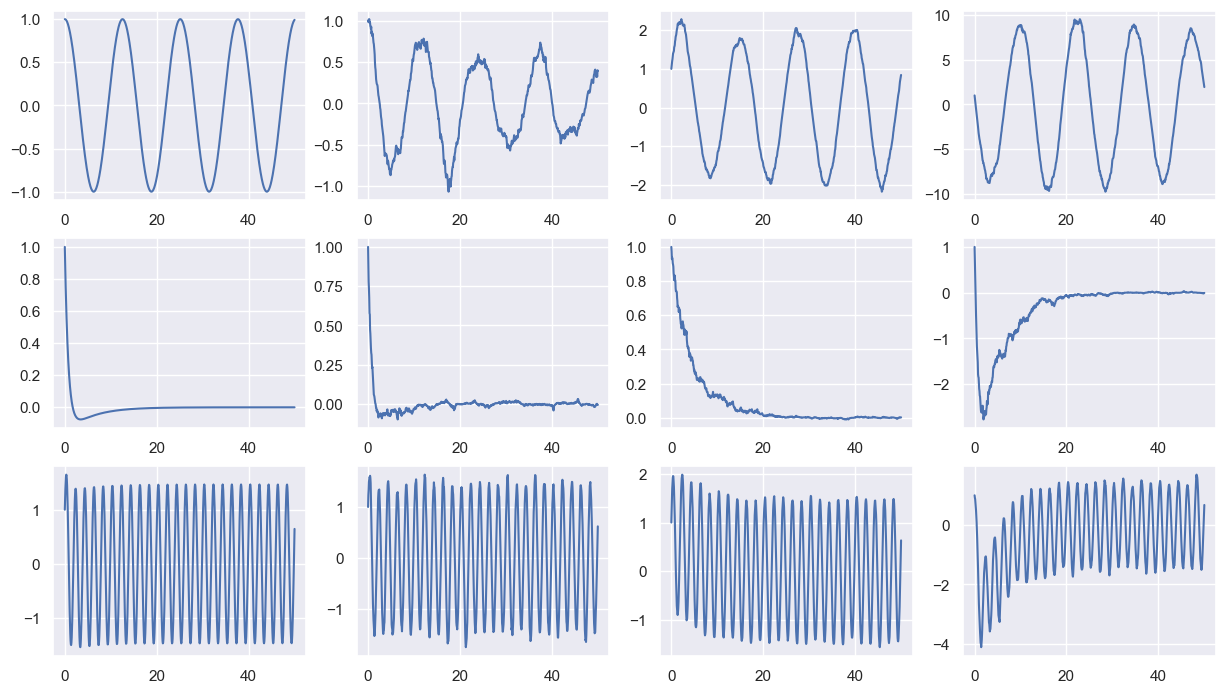

In [5]:
fig = plt.figure(figsize = (15,35))

ax = fig.add_subplot(12,4,1);plt.plot(clear_h6.t,clear_h6.y[1])
ax = fig.add_subplot(12,4,2);plt.plot(sol_h6.t,sol_h6.y[1])
ax = fig.add_subplot(12,4,3);plt.plot(sol_h_g6.t,sol_h_g6.y[1])
ax = fig.add_subplot(12,4,4);plt.plot(sol_h_p6.t,sol_h_p6.y[1])

ax = fig.add_subplot(12,4,5);plt.plot(clear_d6.t,clear_d6.y[1])
ax = fig.add_subplot(12,4,6);plt.plot(sol_d6.t,sol_d6.y[1])
ax = fig.add_subplot(12,4,7);plt.plot(sol_d_g6.t,sol_d_g6.y[1])
ax = fig.add_subplot(12,4,8);plt.plot(sol_d_p6.t,sol_d_p6.y[1])

ax = fig.add_subplot(12,4,9);plt.plot(clear_dr6.t,clear_dr6.y[1])
ax = fig.add_subplot(12,4,10);plt.plot(sol_dr6.t,sol_dr6.y[1])
ax = fig.add_subplot(12,4,11);plt.plot(sol_dr_g6.t,sol_dr_g6.y[1])
ax = fig.add_subplot(12,4,12);plt.plot(sol_dr_p6.t,sol_dr_p6.y[1])
plt.savefig('pics/osc_2.png', dpi=900, bbox_inches = 'tight',
    pad_inches = 1)

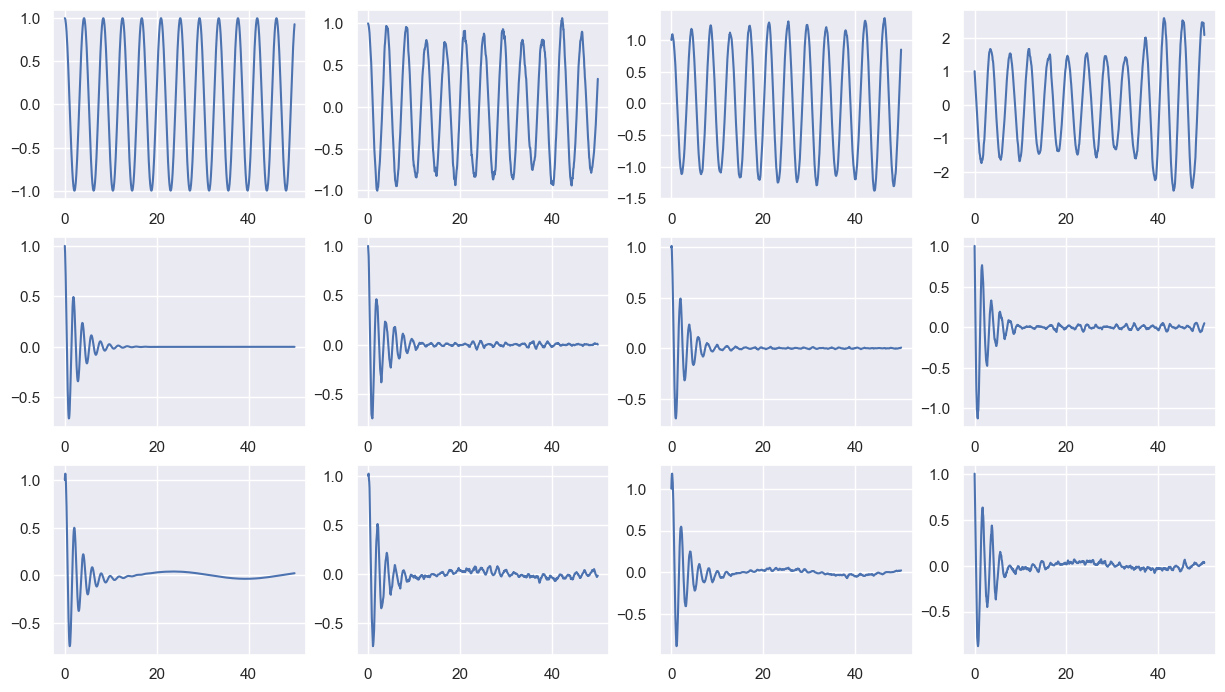

In [6]:
fig = plt.figure(figsize = (15,35))

ax = fig.add_subplot(12,4,1);plt.plot(clear_h7.t,clear_h5.y[1])
ax = fig.add_subplot(12,4,2);plt.plot(sol_h7.t,sol_h5.y[1])
ax = fig.add_subplot(12,4,3);plt.plot(sol_h_g7.t,sol_h_g5.y[1])
ax = fig.add_subplot(12,4,4);plt.plot(sol_h_p7.t,sol_h_p5.y[1])

ax = fig.add_subplot(12,4,5);plt.plot(clear_d7.t,clear_d7.y[1])
ax = fig.add_subplot(12,4,6);plt.plot(sol_d7.t,sol_d7.y[1])
ax = fig.add_subplot(12,4,7);plt.plot(sol_d_g7.t,sol_d_g7.y[1])
ax = fig.add_subplot(12,4,8);plt.plot(sol_d_p7.t,sol_d_p7.y[1])

ax = fig.add_subplot(12,4,9);plt.plot(clear_dr7.t,clear_dr7.y[1])
ax = fig.add_subplot(12,4,10);plt.plot(sol_dr7.t,sol_dr7.y[1])
ax = fig.add_subplot(12,4,11);plt.plot(sol_dr_g7.t,sol_dr_g7.y[1])
ax = fig.add_subplot(12,4,12);plt.plot(sol_dr_p7.t,sol_dr_p7.y[1])

plt.savefig('pics/osc_3.png', dpi=900, bbox_inches = 'tight',
    pad_inches = 1)

In [7]:
def amplitude_fluctuacion(time,position):
    amplitude = array(abs(position)) #calc
    #print(array(amplitude))
    mean_amplitude = mean(amplitude) #stad
    std_amplitude = np.std(amplitude)
    fft_result = fft(amplitude)
    frequencies = scipy.fft.fftfreq(len(amplitude), d=(time[1]-time[0]))
    return amplitude, mean_amplitude, std_amplitude, fft_result, frequencies
    #plot(time, amplitude)
    #plot(frequencies[1::], np.abs(fft_result[1::]))
    #xlabel('Frequency (Hz)')
    #ylabel('Magnitude')
    #title('Frequency Spectrum of Amplitude')

In [8]:
ampc5,meac5, stdc5, resc5, freqc5 = amplitude_fluctuacion(clear_h5.t,clear_h5.y[1])
amp5,mea5, std5, res5, freq5 = amplitude_fluctuacion(sol_h5.t,sol_h5.y[1])
ampd5,mead5, stdd5, resd5, freqd5 = amplitude_fluctuacion(sol_d5.t,sol_d5.y[1])
ampdr5,meadr5, stddr5, resdr5, freqdr5 = amplitude_fluctuacion(sol_dr5.t,sol_dr5.y[1])

dampc5,dmeac5, dstdc5, dresc5, dfreqc5 = amplitude_fluctuacion(clear_d5.t,clear_d5.y[1])
wamp5,wmea5, wstd5, wres5, wfreq5 = amplitude_fluctuacion(sol_h_g5.t,sol_h_g5.y[1])
wampd5,wmead5, wstdd5, wresd5, wfreqd5 = amplitude_fluctuacion(sol_d_g5.t,sol_d_g5.y[1])
wampdr5,wmeadr5, wstddr5, wresdr5, wfreqdr5 = amplitude_fluctuacion(sol_dr_g5.t,sol_dr_g5.y[1])

drampc5,drmeac5, drstdc5, drpresc5, drfreqc5 = amplitude_fluctuacion(clear_dr5.t,clear_dr5.y[1])
pamp5,pmea5, pstd5, pres5, pfreq5 = amplitude_fluctuacion(sol_h_p5.t,sol_h_p5.y[1])
pampd5,pmead5, pstdd5, presd5, pfreqd5 = amplitude_fluctuacion(sol_d_p5.t,sol_d_p5.y[1])
pampdr5,pmeadr5, pstddr5, presdr5, pfreqdr5 = amplitude_fluctuacion(sol_dr_p5.t,sol_dr_p5.y[1])


ampc6,meac6, stdc6, resc6, freqc6 = amplitude_fluctuacion(clear_h6.t,clear_h6.y[1])
amp6,mea6, std6, res6, freq6 = amplitude_fluctuacion(sol_h6.t,sol_h6.y[1])
ampd6,mead6, stdd6, resd6, freqd6 = amplitude_fluctuacion(sol_d6.t,sol_d6.y[1])
ampdr6,meadr6, stddr6, resdr6, freqdr6 = amplitude_fluctuacion(sol_dr6.t,sol_dr6.y[1])

dampc6,dmeac6, dstdc6, dresc6, dfreqc6 = amplitude_fluctuacion(clear_d6.t,clear_d6.y[1])
wamp6,wmea6, wstd6, wres6, wfreq6 = amplitude_fluctuacion(sol_h_g6.t,sol_h_g6.y[1])
wampd6,wmead6, wstdd6, wresd6, wfreqd6 = amplitude_fluctuacion(sol_d_g6.t,sol_d_g6.y[1])
wampdr6,wmeadr6, wstddr6, wresdr6, wfreqdr6 = amplitude_fluctuacion(sol_dr_g6.t,sol_dr_g6.y[1])

drampc6,drmeac6, drstdc6, drpresc6, drfreqc6 = amplitude_fluctuacion(clear_dr6.t,clear_dr6.y[1])
pamp6,pmea6, pstd6, pres6, pfreq6 = amplitude_fluctuacion(sol_h_p6.t,sol_h_p6.y[1])
pampd6,pmead6, pstdd6, presd6, pfreqd6 = amplitude_fluctuacion(sol_d_p6.t,sol_d_p6.y[1])
pampdr6,pmeadr6, pstddr6, presdr6, pfreqdr6 = amplitude_fluctuacion(sol_dr_p6.t,sol_dr_p6.y[1])


ampc7,meac7, stdc7, resc7, freqc7 = amplitude_fluctuacion(clear_h7.t,clear_h7.y[1])
amp7,mea7, std7, res7, freq7 = amplitude_fluctuacion(sol_h7.t,sol_h7.y[1])
ampd7,mead7, stdd7, resd7, freqd7 = amplitude_fluctuacion(sol_d7.t,sol_d7.y[1])
ampdr7,meadr7, stddr7, resdr7, freqdr7 = amplitude_fluctuacion(sol_dr7.t,sol_dr7.y[1])

dampc7,dmeac7, dstdc7, dpresc7, dfreqc7 = amplitude_fluctuacion(clear_d7.t,clear_d7.y[1])
wamp7,wmea7, wstd7, wres7, wfreq7 = amplitude_fluctuacion(sol_h_g7.t,sol_h_g7.y[1])
wampd7,wmead7, wstdd7, wresd7, wfreqd7 = amplitude_fluctuacion(sol_d_g7.t,sol_d_g7.y[1])
wampdr7,wmeadr7, wstddr7, wresdr7, wfreqdr7 = amplitude_fluctuacion(sol_dr_g7.t,sol_dr_g7.y[1])

drampc7,drmeac7, drstdc7, drpresc7, drfreqc7 = amplitude_fluctuacion(clear_dr7.t,clear_dr7.y[1])
pamp7,pmea7, pstd7, pres7, pfreq7 = amplitude_fluctuacion(sol_h_p7.t,sol_h_p7.y[1])
pampd7,pmead7, pstdd7, presd7, pfreqd7 = amplitude_fluctuacion(sol_d_p7.t,sol_d_p7.y[1])
pampdr7,pmeadr7, pstddr7, presdr7, pfreqdr7 = amplitude_fluctuacion(sol_dr_p7.t,sol_dr_p7.y[1])

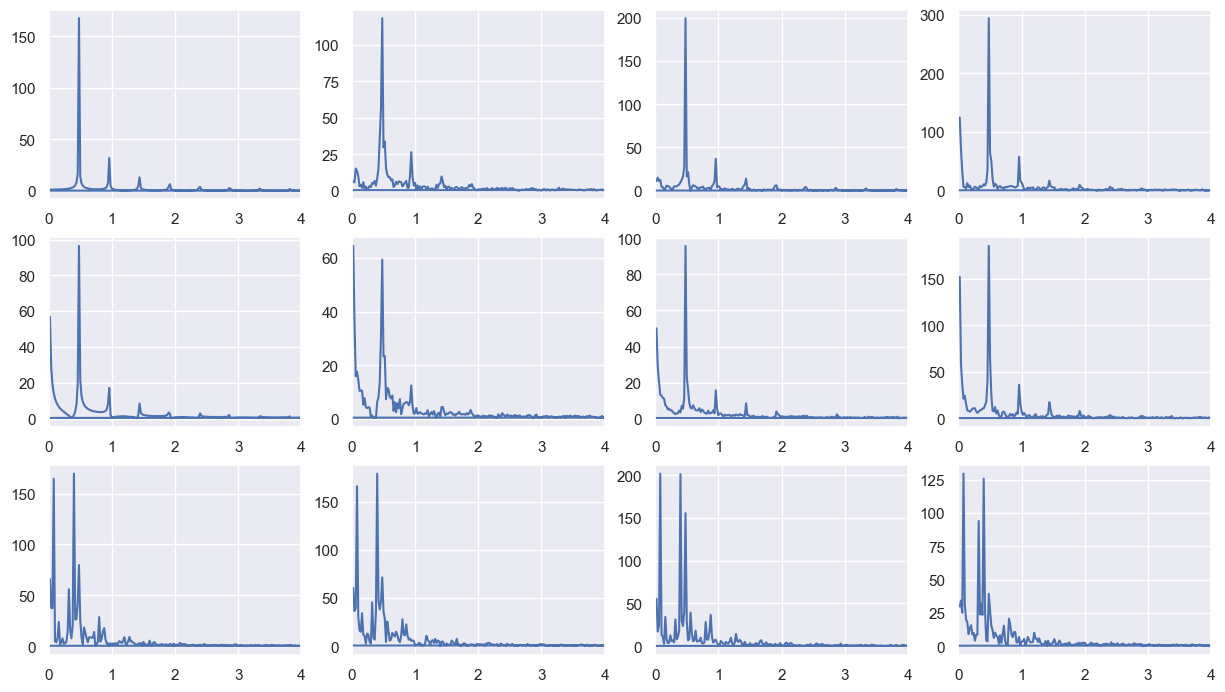

In [9]:
fig = plt.figure(figsize = (15,35))

ax = fig.add_subplot(12,4,1);plt.plot(freqc5[1::], np.abs(resc5[1::]));ax.set_xlim([0, 4])
ax = fig.add_subplot(12,4,2);plt.plot(freq5[1::], np.abs(res5[1::]));ax.set_xlim([0, 4])
ax = fig.add_subplot(12,4,3);plt.plot(wfreq5[1::], np.abs(wres5[1::]));ax.set_xlim([0, 4])
ax = fig.add_subplot(12,4,4);plt.plot(pfreq5[1::], np.abs(pres5[1::]));ax.set_xlim([0, 4])

ax = fig.add_subplot(12,4,5);plt.plot(dfreqc5[1::], np.abs(dresc5[1::]));ax.set_xlim([0, 4])
ax = fig.add_subplot(12,4,6);plt.plot(freqd5[1::], np.abs(resd5[1::]));ax.set_xlim([0, 4])
ax = fig.add_subplot(12,4,7);plt.plot(wfreqd5[1::], np.abs(wresd5[1::]));ax.set_xlim([0, 4])
ax = fig.add_subplot(12,4,8);plt.plot(pfreqd5[1::], np.abs(presd5[1::]));ax.set_xlim([0, 4])

ax = fig.add_subplot(12,4,9);plt.plot(drfreqc5[1::], np.abs(drpresc5[1::]));ax.set_xlim([0, 4])
ax = fig.add_subplot(12,4,10);plt.plot(freqdr5[1::], np.abs(resdr5[1::]));ax.set_xlim([0, 4])
ax = fig.add_subplot(12,4,11);plt.plot(wfreqdr5[1::], np.abs(wresdr5[1::]));ax.set_xlim([0, 4])
ax = fig.add_subplot(12,4,12);plt.plot(pfreqdr5[1::], np.abs(presdr5[1::]));ax.set_xlim([0, 4])

plt.savefig('pics/fft_1.png', dpi=900, bbox_inches = 'tight',
    pad_inches = 1)

In [10]:
fig = plt.figure(figsize = (15,36))

ax = fig.add_subplot(12,4,1);plt.plot(freqc6[1::], np.abs(resc6[1::]));ax.set_xlim([0, 4])
ax = fig.add_subplot(12,4,2);plt.plot(freq6[1::], np.abs(res6[1::]));ax.set_xlim([0, 4])
ax = fig.add_subplot(12,4,3);plt.plot(wfreq6[1::], np.abs(wres6[1::]));ax.set_xlim([0, 4])
ax = fig.add_subplot(12,4,4);plt.plot(pfreq6[1::], np.abs(pres6[1::]));ax.set_xlim([0, 4])

ax = fig.add_subplot(12,4,5);plt.plot(dfreqc6[1::], np.abs(dresc6[1::]));ax.set_xlim([0, 4])
ax = fig.add_subplot(12,4,6);plt.plot(freqd6[1::], np.abs(resd6[1::]));ax.set_xlim([0, 4])
ax = fig.add_subplot(12,4,7);plt.plot(wfreqd6[1::], np.abs(wresd6[1::]));ax.set_xlim([0, 4])
ax = fig.add_subplot(12,4,8);plt.plot(pfreqd6[1::], np.abs(presd6[1::]));ax.set_xlim([0, 4])

ax = fig.add_subplot(12,4,9);plt.plot(drfreqc6[1::], np.abs(drpresc6[1::]));ax.set_xlim([0, 4])
ax = fig.add_subplot(12,4,10);plt.plot(freqdr6[1::], np.abs(resdr6[1::]));ax.set_xlim([0, 4])
ax = fig.add_subplot(12,4,11);plt.plot(wfreqdr6[1::], np.abs(wresdr6[1::]));ax.set_xlim([0, 4])
ax = fig.add_subplot(12,4,12);plt.plot(pfreqdr6[1::], np.abs(presdr6[1::]));ax.set_xlim([0, 4])

plt.savefig('pics/fft_2.png', dpi=900, bbox_inches = 'tight',
    pad_inches = 1)

In [11]:
fig = plt.figure(figsize = (15,37))

ax = fig.add_subplot(12,4,1);plt.plot(freqc7[1::], np.abs(resc7[1::]));ax.set_xlim([0, 4])
ax = fig.add_subplot(12,4,2);plt.plot(freq7[1::], np.abs(res7[1::]));ax.set_xlim([0, 4])
ax = fig.add_subplot(12,4,3);plt.plot(wfreq7[1::], np.abs(wres7[1::]));ax.set_xlim([0, 4])
ax = fig.add_subplot(12,4,4);plt.plot(pfreq7[1::], np.abs(pres7[1::]));ax.set_xlim([0, 4])

ax = fig.add_subplot(12,4,5);plt.plot(dfreqc7[1::], np.abs(dpresc7[1::]));ax.set_xlim([0, 4])
ax = fig.add_subplot(12,4,6);plt.plot(freqd7[1::], np.abs(resd7[1::]));ax.set_xlim([0, 4])
ax = fig.add_subplot(12,4,7);plt.plot(wfreqd7[1::], np.abs(wresd7[1::]));ax.set_xlim([0, 4])
ax = fig.add_subplot(12,4,8);plt.plot(pfreqd7[1::], np.abs(presd7[1::]));ax.set_xlim([0, 4])

ax = fig.add_subplot(12,4,9);plt.plot(drfreqc7[1::], np.abs(drpresc7[1::]));ax.set_xlim([0, 4])
ax = fig.add_subplot(12,4,10);plt.plot(freqdr7[1::], np.abs(resdr7[1::]));ax.set_xlim([0, 4])
ax = fig.add_subplot(12,4,11);plt.plot(wfreqdr7[1::], np.abs(wresdr7[1::]));ax.set_xlim([0, 4])
ax = fig.add_subplot(12,4,12);plt.plot(pfreqdr7[1::], np.abs(presdr7[1::]));ax.set_xlim([0, 4])


plt.savefig('pics/fft_3.png', dpi=900, bbox_inches = 'tight',
    pad_inches = 1)

In [12]:
#for harmonic oscillator
def freq_response(w_2, damping_coeff):
      # Logarithmically spaced frequencies
    amp_0 = [];phas_0 = []
    amp_n = [];phas_n = []
    amp_w = [];phas_w = []
    amp_p = [];phas_p = []
    for omega in frequencies:
    
        omega_0 = np.sqrt(w_2) # angular freq
        H_0 = 1 / ( (omega_0**2 - omega**2) + 1j * omega ) #transfer
        H_n = 1 / ( (omega_0**2 - omega**2) + 1j * omega ) +1/ ( OscillatorSimulator.noise_gauss() +1j)
        H_w = 1 / ( (omega_0**2 - omega**2) + 1j * omega ) +1/ ( OscillatorSimulator.white_noise_uniform() +1j)
        H_p = 1 / ( (omega_0**2 - omega**2) + 1j * omega ) +1/ ( OscillatorSimulator.pink_noise() +1j)
                   
        amplitude_0 = abs(H_0);phase_0 = angle(H_0, deg=True) 
        amplitude_n = abs(H_n);phase_n = angle(H_n, deg=True)
        amplitude_w = abs(H_w);phase_w = angle(H_w, deg=True)
        amplitude_p = abs(H_p);phase_p = angle(H_p, deg=True)

        amp_0.append(amplitude_0);phas_0.append(phase_0)
        amp_n.append(amplitude_n);phas_n.append(phase_n)
        amp_w.append(amplitude_w);phas_w.append(phase_w)
        amp_p.append(amplitude_p);phas_p.append(phase_p)
    
    return amp_0,phas_0, amp_n,phas_n, amp_w,phas_w, amp_p,phas_p
frequencies = np.logspace(-1, 1, 100)

amp_0 = [];phas_0 = [];amp_n = [];phas_n = [];amp_w = [];phas_w = [];amp_p = [];phas_p = []
amp_01 = [];phas_01 = [];amp_n1 = [];phas_n1 = [];amp_w1 = [];phas_w1 = [];amp_p1 = [];phas_p1 = []
amp_02 = [];phas_02 = [];amp_n2 = [];phas_n2 = [];amp_w2 = [];phas_w2 = [];amp_p2 = [];phas_p2 = []

amp_0,phas_0, amp_n,phas_n, amp_w,phas_w, amp_p,phas_p = freq_response(2.25,0.05)
amp_01,phas_01, amp_n1,phas_n1, amp_w1,phas_w1, amp_p1,phas_p1 = freq_response(0.25,1.5)
amp_02,phas_02, amp_n2,phas_n2, amp_w2,phas_w2, amp_p2,phas_p2 = freq_response(10.5,.75)
    
#plt.semilogx(frequencies, amplitudes)
#plt.xlabel('Frequency (Hz)')
#plt.ylabel('Amplitude')
#plt.title('Frequency Response: Amplitude vs. Frequency')
# Phase vs. Frequency
#plt.subplot(2, 1, 2)
#plt.semilogx(frequencies, phases)
#plt.xlabel('Frequency (Hz)')
#plt.ylabel('Phase (degrees)')
#plt.title('Frequency Response: Phase vs. Frequency')

In [13]:
fig = plt.figure(figsize = (15,30))
#title('Frequency Response: Amplitude and Frequency')

ax = fig.add_subplot(12,4,1)
plt.plot(frequencies, amp_0)

ax = fig.add_subplot(12,4,2)
plt.plot(frequencies, amp_n)

ax = fig.add_subplot(12,4,3)
plt.plot(frequencies, amp_w)

ax = fig.add_subplot(12,4,4)
plt.plot(frequencies, amp_p)

ax = fig.add_subplot(12,4,5)
plt.plot(frequencies, amp_01)

ax = fig.add_subplot(12,4,6)
plt.plot(frequencies, amp_n1)

ax = fig.add_subplot(12,4,7)
plt.plot(frequencies, amp_w1)

ax = fig.add_subplot(12,4,8)
plt.plot(frequencies, amp_p1)

ax = fig.add_subplot(12,4,9)
plt.plot(frequencies, amp_02)

ax = fig.add_subplot(12,4,10)
plt.plot(frequencies, amp_n2)

ax = fig.add_subplot(12,4,11)
plt.plot(frequencies, amp_w2)

ax = fig.add_subplot(12,4,12)
plt.plot(frequencies, amp_p2)

plt.savefig('pics/res_amp_freq_har.png', dpi=900, bbox_inches = 'tight',
    pad_inches = 1)

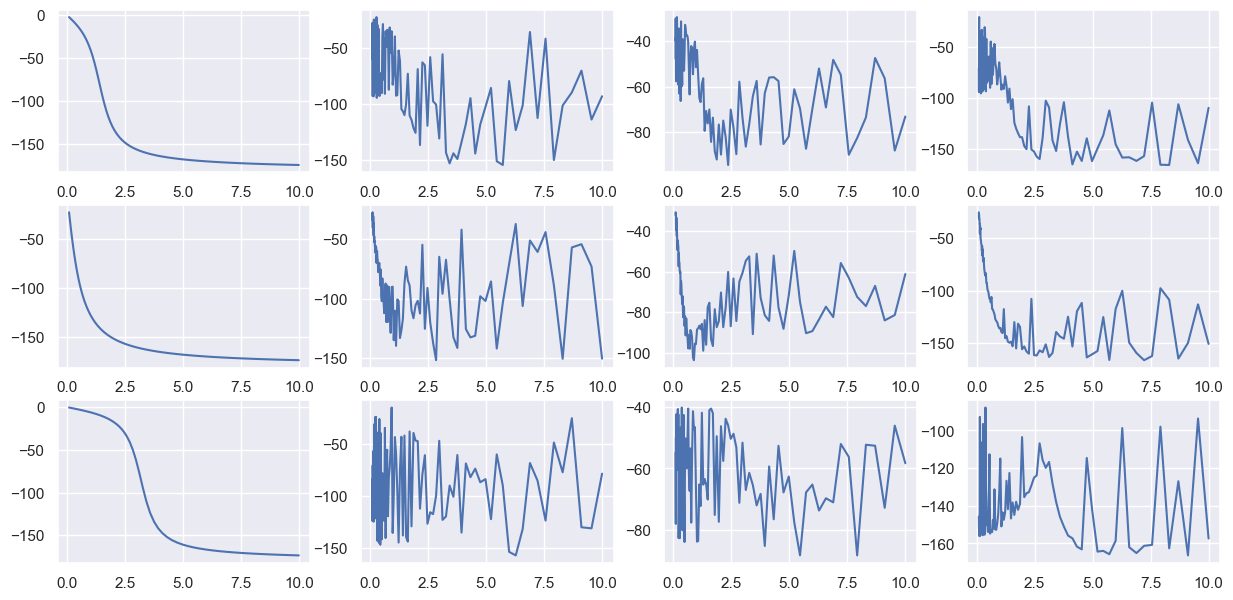

In [14]:
fig = plt.figure(figsize = (15,30))
#title('Frequency Response: Amplitude and Frequency')

ax = fig.add_subplot(12,4,1)
plt.plot(frequencies, phas_0)

ax = fig.add_subplot(12,4,2)
plt.plot(frequencies, phas_n)

ax = fig.add_subplot(12,4,3)
plt.plot(frequencies, phas_w)

ax = fig.add_subplot(12,4,4)
plt.plot(frequencies, phas_p)

ax = fig.add_subplot(12,4,5)
plt.plot(frequencies, phas_01)

ax = fig.add_subplot(12,4,6)
plt.plot(frequencies, phas_n1)

ax = fig.add_subplot(12,4,7)
plt.plot(frequencies, phas_w1)

ax = fig.add_subplot(12,4,8)
plt.plot(frequencies, phas_p1)

ax = fig.add_subplot(12,4,9)
plt.plot(frequencies, phas_02)

ax = fig.add_subplot(12,4,10)
plt.plot(frequencies, phas_n2)

ax = fig.add_subplot(12,4,11)
plt.plot(frequencies, phas_w2)

ax = fig.add_subplot(12,4,12)
plt.plot(frequencies, phas_p2)

plt.savefig('pics/res_phas_freq_har.png', dpi=900, bbox_inches = 'tight',
    pad_inches = 1)

In [15]:
#for harmonic oscillator
def freq_response(w_2, damping_coeff):
      # Logarithmically spaced frequencies
    amp_0 = [];phas_0 = []
    amp_n = [];phas_n = []
    amp_w = [];phas_w = []
    amp_p = [];phas_p = []
    for omega in frequencies:
    
        omega_0 = np.sqrt(w_2) # angular freq
        H_0 = 1 / ( (omega_0**2 - omega**2) + 1j * damping_coeff*omega ) #transfer
        H_n = 1 / ( (omega_0**2 - omega**2) + 1j *damping_coeff* omega ) +1/ ( OscillatorSimulator.noise_gauss() +1j)
        H_w = 1 / ( (omega_0**2 - omega**2) + 1j * damping_coeff*omega ) +1/ ( OscillatorSimulator.white_noise_uniform() +1j)
        H_p = 1 / ( (omega_0**2 - omega**2) + 1j * damping_coeff*omega ) +1/ ( OscillatorSimulator.pink_noise() +1j)
                   
        amplitude_0 = abs(H_0);phase_0 = angle(H_0, deg=True) 
        amplitude_n = abs(H_n);phase_n = angle(H_n, deg=True)
        amplitude_w = abs(H_w);phase_w = angle(H_w, deg=True)
        amplitude_p = abs(H_p);phase_p = angle(H_p, deg=True)

        amp_0.append(amplitude_0);phas_0.append(phase_0)
        amp_n.append(amplitude_n);phas_n.append(phase_n)
        amp_w.append(amplitude_w);phas_w.append(phase_w)
        amp_p.append(amplitude_p);phas_p.append(phase_p)
    
    return amp_0,phas_0, amp_n,phas_n, amp_w,phas_w, amp_p,phas_p
frequencies = np.logspace(-1, 1, 100)

amp_0 = [];phas_0 = [];amp_n = [];phas_n = [];amp_w = [];phas_w = [];amp_p = [];phas_p = []
amp_01 = [];phas_01 = [];amp_n1 = [];phas_n1 = [];amp_w1 = [];phas_w1 = [];amp_p1 = [];phas_p1 = []
amp_02 = [];phas_02 = [];amp_n2 = [];phas_n2 = [];amp_w2 = [];phas_w2 = [];amp_p2 = [];phas_p2 = []

amp_0,phas_0, amp_n,phas_n, amp_w,phas_w, amp_p,phas_p = freq_response(2.25,0.05)
amp_01,phas_01, amp_n1,phas_n1, amp_w1,phas_w1, amp_p1,phas_p1 = freq_response(0.25,1.5)
amp_02,phas_02, amp_n2,phas_n2, amp_w2,phas_w2, amp_p2,phas_p2 = freq_response(10.5,.75)
    
#plt.semilogx(frequencies, amplitudes)
#plt.xlabel('Frequency (Hz)')
#plt.ylabel('Amplitude')
#plt.title('Frequency Response: Amplitude vs. Frequency')
# Phase vs. Frequency
#plt.subplot(2, 1, 2)
#plt.semilogx(frequencies, phases)
#plt.xlabel('Frequency (Hz)')
#plt.ylabel('Phase (degrees)')
#plt.title('Frequency Response: Phase vs. Frequency')

In [16]:
fig = plt.figure(figsize = (15,30))
#title('Frequency Response: Amplitude and Frequency')

ax = fig.add_subplot(12,4,1)
plt.plot(frequencies, amp_0)

ax = fig.add_subplot(12,4,2)
plt.plot(frequencies, amp_n)

ax = fig.add_subplot(12,4,3)
plt.plot(frequencies, amp_w)

ax = fig.add_subplot(12,4,4)
plt.plot(frequencies, amp_p)

ax = fig.add_subplot(12,4,5)
plt.plot(frequencies, amp_01)

ax = fig.add_subplot(12,4,6)
plt.plot(frequencies, amp_n1)

ax = fig.add_subplot(12,4,7)
plt.plot(frequencies, amp_w1)

ax = fig.add_subplot(12,4,8)
plt.plot(frequencies, amp_p1)

ax = fig.add_subplot(12,4,9)
plt.plot(frequencies, amp_02)

ax = fig.add_subplot(12,4,10)
plt.plot(frequencies, amp_n2)

ax = fig.add_subplot(12,4,11)
plt.plot(frequencies, amp_w2)

ax = fig.add_subplot(12,4,12)
plt.plot(frequencies, amp_p2)

plt.savefig('pics/res_amp_freq_damp.png', dpi=900, bbox_inches = 'tight',
    pad_inches = 1)

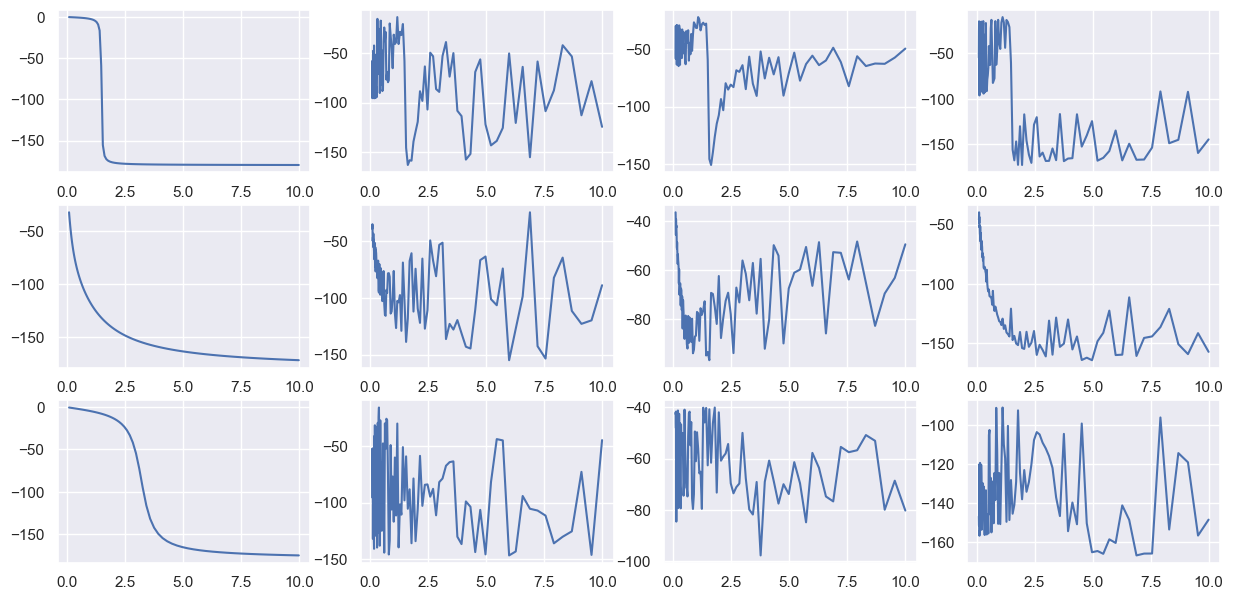

In [17]:
fig = plt.figure(figsize = (15,30))
#title('Frequency Response: Amplitude and Frequency')

ax = fig.add_subplot(12,4,1)
plt.plot(frequencies, phas_0)

ax = fig.add_subplot(12,4,2)
plt.plot(frequencies, phas_n)

ax = fig.add_subplot(12,4,3)
plt.plot(frequencies, phas_w)

ax = fig.add_subplot(12,4,4)
plt.plot(frequencies, phas_p)

ax = fig.add_subplot(12,4,5)
plt.plot(frequencies, phas_01)

ax = fig.add_subplot(12,4,6)
plt.plot(frequencies, phas_n1)

ax = fig.add_subplot(12,4,7)
plt.plot(frequencies, phas_w1)

ax = fig.add_subplot(12,4,8)
plt.plot(frequencies, phas_p1)

ax = fig.add_subplot(12,4,9)
plt.plot(frequencies, phas_02)

ax = fig.add_subplot(12,4,10)
plt.plot(frequencies, phas_n2)

ax = fig.add_subplot(12,4,11)
plt.plot(frequencies, phas_w2)

ax = fig.add_subplot(12,4,12)
plt.plot(frequencies, phas_p2)

plt.savefig('pics/res_phase_freq_damp.png', dpi=900, bbox_inches = 'tight',
    pad_inches = 1)

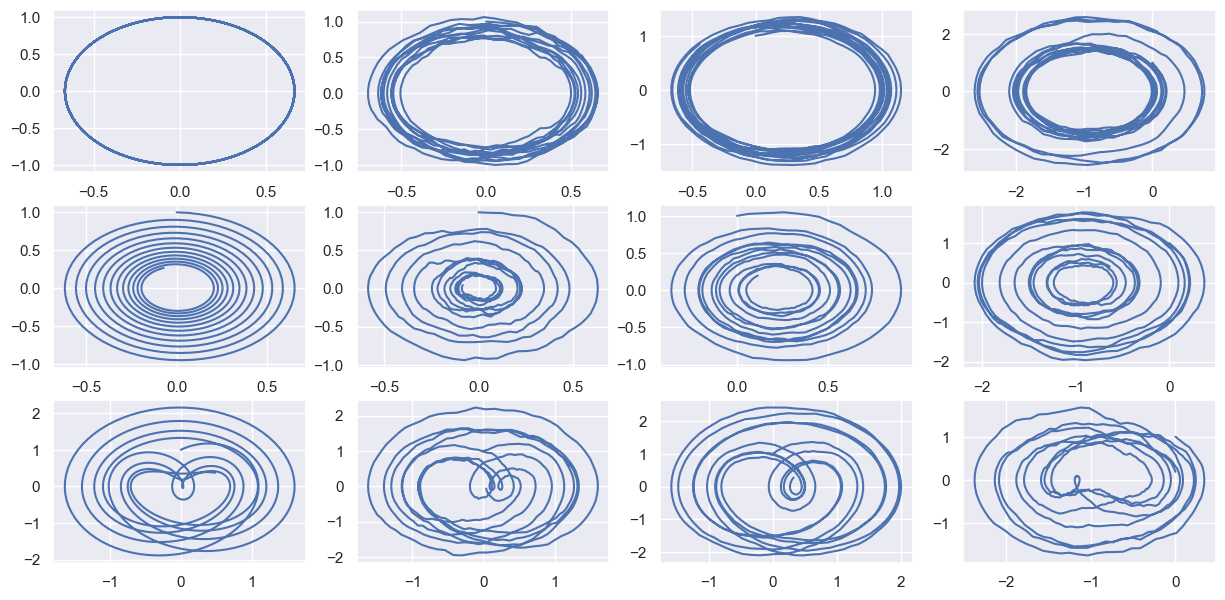

In [18]:
#4 Phase space analysis
fig = plt.figure(figsize = (15,30))

ax = fig.add_subplot(12,4,1)
plot(clear_h5.y[0],clear_h5.y[1]) 
ax = fig.add_subplot(12,4,2)
plot(sol_h5.y[0],sol_h5.y[1])
ax = fig.add_subplot(12,4,3)
plot(sol_h_g5.y[0],sol_h_g5.y[1])
ax = fig.add_subplot(12,4,4)
plot(sol_h_p5.y[0],sol_h_p5.y[1])

ax = fig.add_subplot(12,4,5)
plot(clear_d5.y[0],clear_d5.y[1]) 
ax = fig.add_subplot(12,4,6)
plot(sol_d5.y[0],sol_d5.y[1])
ax = fig.add_subplot(12,4,7)
plot(sol_d_g5.y[0],sol_d_g5.y[1])
ax = fig.add_subplot(12,4,8)
plot(sol_d_p5.y[0],sol_d_p5.y[1])

ax = fig.add_subplot(12,4,9)
plot(clear_dr5.y[0],clear_dr5.y[1]) 
ax = fig.add_subplot(12,4,10)
plot(sol_dr5.y[0],sol_dr5.y[1])
ax = fig.add_subplot(12,4,11)
plot(sol_dr_g5.y[0],sol_dr_g5.y[1])
ax = fig.add_subplot(12,4,12)
plot(sol_dr_p5.y[0],sol_dr_p5.y[1])

plt.savefig('pics/phasespace_1.png', dpi=900, bbox_inches = 'tight',
    pad_inches = 1)

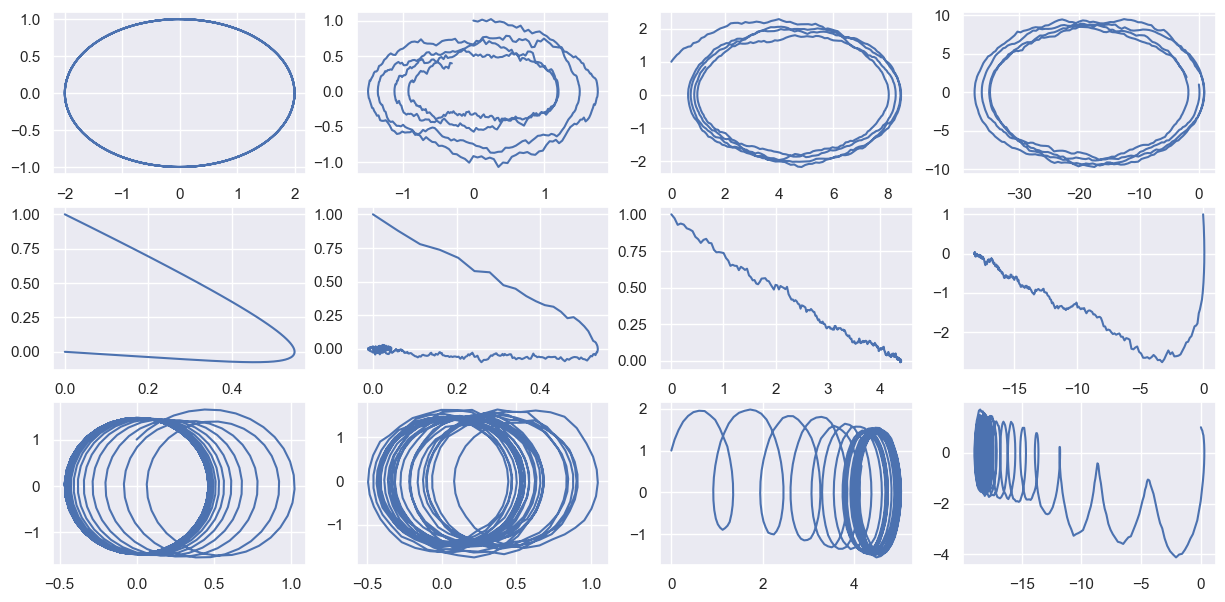

In [19]:
#4 Phase space analysis
fig = plt.figure(figsize = (15,30))

ax = fig.add_subplot(12,4,1)
plot(clear_h6.y[0],clear_h6.y[1]) 
ax = fig.add_subplot(12,4,2)
plot(sol_h6.y[0],sol_h6.y[1])
ax = fig.add_subplot(12,4,3)
plot(sol_h_g6.y[0],sol_h_g6.y[1])
ax = fig.add_subplot(12,4,4)
plot(sol_h_p6.y[0],sol_h_p6.y[1])

ax = fig.add_subplot(12,4,5)
plot(clear_d6.y[0],clear_d6.y[1]) 
ax = fig.add_subplot(12,4,6)
plot(sol_d6.y[0],sol_d6.y[1])
ax = fig.add_subplot(12,4,7)
plot(sol_d_g6.y[0],sol_d_g6.y[1])
ax = fig.add_subplot(12,4,8)
plot(sol_d_p6.y[0],sol_d_p6.y[1])

ax = fig.add_subplot(12,4,9)
plot(clear_dr6.y[0],clear_dr6.y[1]) 
ax = fig.add_subplot(12,4,10)
plot(sol_dr6.y[0],sol_dr6.y[1])
ax = fig.add_subplot(12,4,11)
plot(sol_dr_g6.y[0],sol_dr_g6.y[1])
ax = fig.add_subplot(12,4,12)
plot(sol_dr_p6.y[0],sol_dr_p6.y[1])

plt.savefig('pics/phasespace_2.png', dpi=900, bbox_inches = 'tight',
    pad_inches = 1)

In [20]:
#4 Phase space analysis
fig = plt.figure(figsize = (15,30))

ax = fig.add_subplot(12,4,1)
plot(clear_h7.y[0],clear_h7.y[1]) 
ax = fig.add_subplot(12,4,2)
plot(sol_h7.y[0],sol_h7.y[1])
ax = fig.add_subplot(12,4,3)
plot(sol_h_g7.y[0],sol_h_g7.y[1])
ax = fig.add_subplot(12,4,4)
plot(sol_h_p7.y[0],sol_h_p7.y[1])

ax = fig.add_subplot(12,4,5)
plot(clear_d7.y[0],clear_d7.y[1]) 
ax = fig.add_subplot(12,4,6)
plot(sol_d7.y[0],sol_d7.y[1])
ax = fig.add_subplot(12,4,7)
plot(sol_d_g7.y[0],sol_d_g7.y[1])
ax = fig.add_subplot(12,4,8)
plot(sol_d_p7.y[0],sol_d_p7.y[1])

ax = fig.add_subplot(12,4,9)
plot(clear_dr7.y[0],clear_dr7.y[1]) 
ax = fig.add_subplot(12,4,10)
plot(sol_dr7.y[0],sol_dr7.y[1])
ax = fig.add_subplot(12,4,11)
plot(sol_dr_g7.y[0],sol_dr_g7.y[1])
ax = fig.add_subplot(12,4,12)
plot(sol_dr_p7.y[0],sol_dr_p7.y[1])

plt.savefig('pics/phasespace_3.png', dpi=900, bbox_inches = 'tight',
    pad_inches = 1)


In [21]:
fig = plt.figure(figsize = (15,30))
ax = fig.add_subplot(12,4,1)
plt.psd(clear_h5.y[1], Fs=100, NFFT=1024, noverlap=512)

ax = fig.add_subplot(12,4,2)
plt.psd(sol_h5.y[1], Fs=100, NFFT=1024, noverlap=512)

ax = fig.add_subplot(12,4,3)
plt.psd(sol_h_g5.y[1], Fs=100, NFFT=1024, noverlap=512)

ax = fig.add_subplot(12,4,4)
plt.psd(sol_h_p5.y[1], Fs=100, NFFT=1024, noverlap=512)

ax = fig.add_subplot(12,4,5)
plt.psd(clear_d5.y[1], Fs=100, NFFT=1024, noverlap=512)

ax = fig.add_subplot(12,4,6)
plt.psd(sol_d5.y[1], Fs=100, NFFT=1024, noverlap=512)

ax = fig.add_subplot(12,4,7)
plt.psd(sol_d_g5.y[1], Fs=100, NFFT=1024, noverlap=512)

ax = fig.add_subplot(12,4,8)
plt.psd(sol_d_p5.y[1], Fs=100, NFFT=1024, noverlap=512)

ax = fig.add_subplot(12,4,9)
plt.psd(clear_dr5.y[1], Fs=100, NFFT=1024, noverlap=512)

ax = fig.add_subplot(12,4,10)
plt.psd(sol_dr5.y[1], Fs=100, NFFT=1024, noverlap=512)

ax = fig.add_subplot(12,4,11)
plt.psd(sol_dr_g5.y[1], Fs=100, NFFT=1024, noverlap=512)

ax = fig.add_subplot(12,4,12)
plt.psd(sol_dr_p5.y[1], Fs=100, NFFT=1024, noverlap=512)

plt.savefig('pics/psd_1.png', dpi=900, bbox_inches = 'tight',
    pad_inches = 1)

#plt.xlabel('Frequency (Hz)')
#plt.ylabel('Power/Frequency (dB/Hz)')
#plt.title('Power Spectral Density (PSD)')

In [22]:
fig = plt.figure(figsize = (15,30))
ax = fig.add_subplot(12,4,1)
plt.psd(clear_h6.y[1], Fs=100, NFFT=1024, noverlap=612)

ax = fig.add_subplot(12,4,2)
plt.psd(sol_h6.y[1], Fs=100, NFFT=1024, noverlap=612)

ax = fig.add_subplot(12,4,3)
plt.psd(sol_h_g6.y[1], Fs=100, NFFT=1024, noverlap=612)

ax = fig.add_subplot(12,4,4)
plt.psd(sol_h_p6.y[1], Fs=100, NFFT=1024, noverlap=612)

ax = fig.add_subplot(12,4,5)
plt.psd(clear_d6.y[1], Fs=100, NFFT=1024, noverlap=612)

ax = fig.add_subplot(12,4,6)
plt.psd(sol_d6.y[1], Fs=100, NFFT=1024, noverlap=612)

ax = fig.add_subplot(12,4,7)
plt.psd(sol_d_g6.y[1], Fs=100, NFFT=1024, noverlap=612)

ax = fig.add_subplot(12,4,8)
plt.psd(sol_d_p6.y[1], Fs=100, NFFT=1024, noverlap=612)

ax = fig.add_subplot(12,4,9)
plt.psd(clear_dr6.y[1], Fs=100, NFFT=1024, noverlap=612)

ax = fig.add_subplot(12,4,10)
plt.psd(sol_dr6.y[1], Fs=100, NFFT=1024, noverlap=612)

ax = fig.add_subplot(12,4,11)
plt.psd(sol_dr_g6.y[1], Fs=100, NFFT=1024, noverlap=612)

ax = fig.add_subplot(12,4,12)
plt.psd(sol_dr_p6.y[1], Fs=100, NFFT=1024, noverlap=612)

plt.savefig('pics/psd_2.png', dpi=900, bbox_inches = 'tight',
    pad_inches = 1)

#plt.xlabel('Frequency (Hz)')
#plt.ylabel('Power/Frequency (dB/Hz)')
#plt.title('Power Spectral Density (PSD)')

In [23]:
fig = plt.figure(figsize = (15,30))

ax = fig.add_subplot(12,4,1)
plt.psd(clear_h7.y[1], Fs=100, NFFT=1024, noverlap=712)

ax = fig.add_subplot(12,4,2)
plt.psd(sol_h7.y[1], Fs=100, NFFT=1024, noverlap=712)

ax = fig.add_subplot(12,4,3)
plt.psd(sol_h_g7.y[1], Fs=100, NFFT=1024, noverlap=712)

ax = fig.add_subplot(12,4,4)
plt.psd(sol_h_p7.y[1], Fs=100, NFFT=1024, noverlap=712)

ax = fig.add_subplot(12,4,5)
plt.psd(clear_d7.y[1], Fs=100, NFFT=1024, noverlap=712)

ax = fig.add_subplot(12,4,6)
plt.psd(sol_d7.y[1], Fs=100, NFFT=1024, noverlap=712)

ax = fig.add_subplot(12,4,7)
plt.psd(sol_d_g7.y[1], Fs=100, NFFT=1024, noverlap=712)

ax = fig.add_subplot(12,4,8)
plt.psd(sol_d_p7.y[1], Fs=100, NFFT=1024, noverlap=712)

ax = fig.add_subplot(12,4,9)
plt.psd(clear_dr7.y[1], Fs=100, NFFT=1024, noverlap=712)

ax = fig.add_subplot(12,4,10)
plt.psd(sol_dr7.y[1], Fs=100, NFFT=1024, noverlap=712)

ax = fig.add_subplot(12,4,11)
plt.psd(sol_dr_g7.y[1], Fs=100, NFFT=1024, noverlap=712)

ax = fig.add_subplot(12,4,12)
plt.psd(sol_dr_p7.y[1], Fs=100, NFFT=1024, noverlap=712)

plt.savefig('pics/psd_3.png', dpi=900, bbox_inches = 'tight',
    pad_inches = 1)

#plt.xlabel('Frequency (Hz)')
#plt.ylabel('Power/Frequency (dB/Hz)')
#plt.title('Power Spectral Density (PSD)')


In [24]:
fig = plt.figure(figsize = (15,30))
ax = fig.add_subplot(12,4,1)
plt.specgram(clear_h5.y[1], Fs=100, NFFT=1024, noverlap=512)

ax = fig.add_subplot(12,4,2)
plt.specgram(sol_h5.y[1], Fs=100, NFFT=1024, noverlap=512)

ax = fig.add_subplot(12,4,3)
plt.specgram(sol_h_g5.y[1], Fs=100, NFFT=1024, noverlap=512)

ax = fig.add_subplot(12,4,4)
plt.specgram(sol_h_p5.y[1], Fs=100, NFFT=1024, noverlap=512)

ax = fig.add_subplot(12,4,5)
plt.specgram(clear_d5.y[1], Fs=100, NFFT=1024, noverlap=512)

ax = fig.add_subplot(12,4,6)
plt.specgram(sol_d5.y[1], Fs=100, NFFT=1024, noverlap=512)

ax = fig.add_subplot(12,4,7)
plt.specgram(sol_d_g5.y[1], Fs=100, NFFT=1024, noverlap=512)

ax = fig.add_subplot(12,4,8)
plt.specgram(sol_d_p5.y[1], Fs=100, NFFT=1024, noverlap=512)

ax = fig.add_subplot(12,4,9)
plt.specgram(clear_dr5.y[1], Fs=100, NFFT=1024, noverlap=512)

ax = fig.add_subplot(12,4,10)
plt.specgram(sol_dr5.y[1], Fs=100, NFFT=1024, noverlap=512)

ax = fig.add_subplot(12,4,11)
plt.specgram(sol_dr_g5.y[1], Fs=100, NFFT=1024, noverlap=512)

ax = fig.add_subplot(12,4,12)
plt.specgram(sol_dr_p5.y[1], Fs=100, NFFT=1024, noverlap=512)

plt.savefig('pics/sepctram_3.png', dpi=900, bbox_inches = 'tight',
    pad_inches = 1)

#plt.xlabel('Signal')
#plt.ylabel('Frequency (dB/Hz)')

C:\Users\weisz\AppData\Local\Temp\ipykernel_4124\1776463334.py:3: UserWarning: Only one segment is calculated since parameter NFFT (=1024) >= signal length (=800).
  plt.specgram(clear_h5.y[1], Fs=100, NFFT=1024, noverlap=512)
C:\Users\weisz\AppData\Local\Temp\ipykernel_4124\1776463334.py:6: UserWarning: Only one segment is calculated since parameter NFFT (=1024) >= signal length (=800).
  plt.specgram(sol_h5.y[1], Fs=100, NFFT=1024, noverlap=512)
C:\Users\weisz\AppData\Local\Temp\ipykernel_4124\1776463334.py:9: UserWarning: Only one segment is calculated since parameter NFFT (=1024) >= signal length (=800).
  plt.specgram(sol_h_g5.y[1], Fs=100, NFFT=1024, noverlap=512)
C:\Users\weisz\AppData\Local\Temp\ipykernel_4124\1776463334.py:12: UserWarning: Only one segment is calculated since parameter NFFT (=1024) >= signal length (=800).
  plt.specgram(sol_h_p5.y[1], Fs=100, NFFT=1024, noverlap=512)
C:\Users\weisz\AppData\Local\Temp\ipykernel_4124\1776463334.py:15: UserWarning: Only one segm

In [25]:
fig = plt.figure(figsize = (15,30))
ax = fig.add_subplot(12,4,1)
plt.specgram(clear_h6.y[1], Fs=100, NFFT=1024, noverlap=612)

ax = fig.add_subplot(12,4,2)
plt.specgram(sol_h6.y[1], Fs=100, NFFT=1024, noverlap=612)

ax = fig.add_subplot(12,4,3)
plt.specgram(sol_h_g6.y[1], Fs=100, NFFT=1024, noverlap=612)

ax = fig.add_subplot(12,4,4)
plt.specgram(sol_h_p6.y[1], Fs=100, NFFT=1024, noverlap=612)

ax = fig.add_subplot(12,4,5)
plt.specgram(clear_d6.y[1], Fs=100, NFFT=1024, noverlap=612)

ax = fig.add_subplot(12,4,6)
plt.specgram(sol_d6.y[1], Fs=100, NFFT=1024, noverlap=612)

ax = fig.add_subplot(12,4,7)
plt.specgram(sol_d_g6.y[1], Fs=100, NFFT=1024, noverlap=612)

ax = fig.add_subplot(12,4,8)
plt.specgram(sol_d_p6.y[1], Fs=100, NFFT=1024, noverlap=612)

ax = fig.add_subplot(12,4,9)
plt.specgram(clear_dr6.y[1], Fs=100, NFFT=1024, noverlap=612)

ax = fig.add_subplot(12,4,10)
plt.specgram(sol_dr6.y[1], Fs=100, NFFT=1024, noverlap=612)

ax = fig.add_subplot(12,4,11)
plt.specgram(sol_dr_g6.y[1], Fs=100, NFFT=1024, noverlap=612)

ax = fig.add_subplot(12,4,12)
plt.specgram(sol_dr_p6.y[1], Fs=100, NFFT=1024, noverlap=612)

plt.savefig('pics/sepctram_2.png', dpi=900, bbox_inches = 'tight',
    pad_inches = 1)

#plt.xlabel('Signal')
#plt.ylabel('Frequency (dB/Hz)')

C:\Users\weisz\AppData\Local\Temp\ipykernel_4124\3648779542.py:3: UserWarning: Only one segment is calculated since parameter NFFT (=1024) >= signal length (=800).
  plt.specgram(clear_h6.y[1], Fs=100, NFFT=1024, noverlap=612)
C:\Users\weisz\AppData\Local\Temp\ipykernel_4124\3648779542.py:6: UserWarning: Only one segment is calculated since parameter NFFT (=1024) >= signal length (=800).
  plt.specgram(sol_h6.y[1], Fs=100, NFFT=1024, noverlap=612)
C:\Users\weisz\AppData\Local\Temp\ipykernel_4124\3648779542.py:9: UserWarning: Only one segment is calculated since parameter NFFT (=1024) >= signal length (=800).
  plt.specgram(sol_h_g6.y[1], Fs=100, NFFT=1024, noverlap=612)
C:\Users\weisz\AppData\Local\Temp\ipykernel_4124\3648779542.py:12: UserWarning: Only one segment is calculated since parameter NFFT (=1024) >= signal length (=800).
  plt.specgram(sol_h_p6.y[1], Fs=100, NFFT=1024, noverlap=612)
C:\Users\weisz\AppData\Local\Temp\ipykernel_4124\3648779542.py:15: UserWarning: Only one segm

In [26]:
fig = plt.figure(figsize = (15,30))

ax = fig.add_subplot(12,4,1)
plt.specgram(clear_h7.y[1], Fs=16, NFFT=1024, noverlap=712)

ax = fig.add_subplot(12,4,2)
plt.specgram(sol_h7.y[1], Fs=16, NFFT=1024, noverlap=712)

ax = fig.add_subplot(12,4,3)
plt.specgram(sol_h_g7.y[1], Fs=16, NFFT=1024, noverlap=712)

ax = fig.add_subplot(12,4,4)
plt.specgram(sol_h_p7.y[1], Fs=16, NFFT=1024, noverlap=712)

ax = fig.add_subplot(12,4,5)
plt.specgram(clear_d7.y[1], Fs=16, NFFT=1024, noverlap=712)

ax = fig.add_subplot(12,4,6)
plt.specgram(sol_d7.y[1], Fs=16, NFFT=1024, noverlap=712)

ax = fig.add_subplot(12,4,7)
plt.specgram(sol_d_g7.y[1], Fs=16, NFFT=1024, noverlap=712)

ax = fig.add_subplot(12,4,8)
plt.specgram(sol_d_p7.y[1], Fs=16, NFFT=1024, noverlap=712)

ax = fig.add_subplot(12,4,9)
plt.specgram(clear_dr7.y[1], Fs=16, NFFT=1024, noverlap=712)

ax = fig.add_subplot(12,4,10)
plt.specgram(sol_dr7.y[1], Fs=16, NFFT=1024, noverlap=712)

ax = fig.add_subplot(12,4,11)
plt.specgram(sol_dr_g7.y[1], Fs=16, NFFT=1024, noverlap=712)

ax = fig.add_subplot(12,4,12)
plt.specgram(sol_dr_p7.y[1], Fs=16, NFFT=1024, noverlap=712)

plt.savefig('pics/sepctram_3.png', dpi=900, bbox_inches = 'tight',
    pad_inches = 1)
#plt.xlabel('Signal')
#plt.ylabel('Frequency (dB/Hz)')

C:\Users\weisz\AppData\Local\Temp\ipykernel_4124\95642471.py:4: UserWarning: Only one segment is calculated since parameter NFFT (=1024) >= signal length (=800).
  plt.specgram(clear_h7.y[1], Fs=16, NFFT=1024, noverlap=712)
C:\Users\weisz\AppData\Local\Temp\ipykernel_4124\95642471.py:7: UserWarning: Only one segment is calculated since parameter NFFT (=1024) >= signal length (=800).
  plt.specgram(sol_h7.y[1], Fs=16, NFFT=1024, noverlap=712)
C:\Users\weisz\AppData\Local\Temp\ipykernel_4124\95642471.py:10: UserWarning: Only one segment is calculated since parameter NFFT (=1024) >= signal length (=800).
  plt.specgram(sol_h_g7.y[1], Fs=16, NFFT=1024, noverlap=712)
C:\Users\weisz\AppData\Local\Temp\ipykernel_4124\95642471.py:13: UserWarning: Only one segment is calculated since parameter NFFT (=1024) >= signal length (=800).
  plt.specgram(sol_h_p7.y[1], Fs=16, NFFT=1024, noverlap=712)
C:\Users\weisz\AppData\Local\Temp\ipykernel_4124\95642471.py:16: UserWarning: Only one segment is calcul

In [27]:
pxx,  freq, t, cax = plt.specgram((sol_h7.y[1]), Fs=16, NFFT=1024, noverlap=712)
fig.colorbar(cax).set_label('Intensity [dB]')
plt.savefig('pics/cutcolorbar.png', dpi=900, bbox_inches = 'tight',
    pad_inches = 1)

C:\Users\weisz\AppData\Local\Temp\ipykernel_4124\120839856.py:1: UserWarning: Only one segment is calculated since parameter NFFT (=1024) >= signal length (=800).
  pxx,  freq, t, cax = plt.specgram((sol_h7.y[1]), Fs=16, NFFT=1024, noverlap=712)


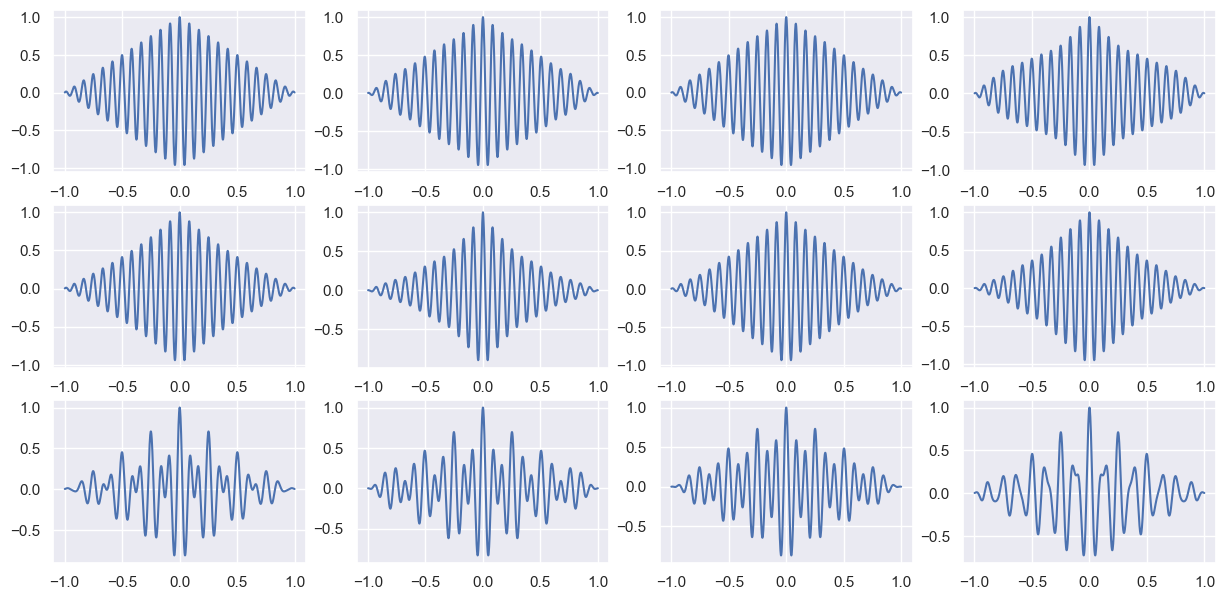

In [28]:
#6 Autocorrelation Function python
lags = arange(-800 + 1,800)
#self corr

acf_c5 = correlate(clear_h5.y[1], clear_h5.y[1], mode='full')
acf_c5 /= max(acf_c5) 
acf_5 = correlate(sol_h5.y[1], sol_h5.y[1], mode='full')
acf_5 /= max(acf_5) 
acf_w5 = correlate(sol_h_g5.y[1], sol_h_g5.y[1], mode='full')
acf_w5 /= max(acf_w5)
acf_p5 = correlate(sol_h_p5.y[1], sol_h_p5.y[1], mode='full')
acf_p5 /=max(acf_p5)


dacf_c5 = correlate(clear_d5.y[1], clear_d5.y[1], mode='full')
dacf_c5 /= max(dacf_c5) 
dacf_5 = correlate(sol_d5.y[1], sol_d5.y[1], mode='full')
dacf_5 /= max(dacf_5) 
dacf_w5 = correlate(sol_d_g5.y[1], sol_d_g5.y[1], mode='full')
dacf_w5 /= max(dacf_w5)
dacf_p5 = correlate(sol_d_p5.y[1], sol_d_p5.y[1], mode='full')
dacf_p5 /=max(dacf_p5)

racf_c5 = correlate(clear_dr5.y[1], clear_dr5.y[1], mode='full')
racf_c5 /= max(racf_c5) 
racf_5 = correlate(sol_dr5.y[1], sol_dr5.y[1], mode='full')
racf_5 /= max(racf_5) 
racf_w5 = correlate(sol_dr_g5.y[1], sol_dr_g5.y[1], mode='full')
racf_w5 /= max(racf_w5)
racf_p5 = correlate(sol_dr_p5.y[1], sol_dr_p5.y[1], mode='full')
racf_p5 /=max(racf_p5)



fig = plt.figure(figsize = (15,30))

ax = fig.add_subplot(12,4,1)
plot(lags / 800, acf_c5)

ax = fig.add_subplot(12,4,2)
plot(lags / 800, acf_5)

ax = fig.add_subplot(12,4,3)
plot(lags / 800, acf_w5)

ax = fig.add_subplot(12,4,4)
plot(lags / 800, acf_p5)

ax = fig.add_subplot(12,4,5)
plot(lags / 800, dacf_c5)

ax = fig.add_subplot(12,4,6)
plot(lags / 800, dacf_5)

ax = fig.add_subplot(12,4,7)
plot(lags / 800, dacf_w5)

ax = fig.add_subplot(12,4,8)
plot(lags / 800, dacf_p5)

ax = fig.add_subplot(12,4,9)
plot(lags / 800, racf_c5)

ax = fig.add_subplot(12,4,10)
plot(lags / 800, racf_5)

ax = fig.add_subplot(12,4,11)
plot(lags / 800, racf_w5)

ax = fig.add_subplot(12,4,12)
plot(lags / 800, racf_p5)

plt.savefig('pics/autocorr_1.png', dpi=900, bbox_inches = 'tight',
    pad_inches = 1)

#plt.xlabel('Time Lag (s)')
#plt.ylabel('Autocorrelation')
#plt.title('Autocorrelation Function (ACF)')


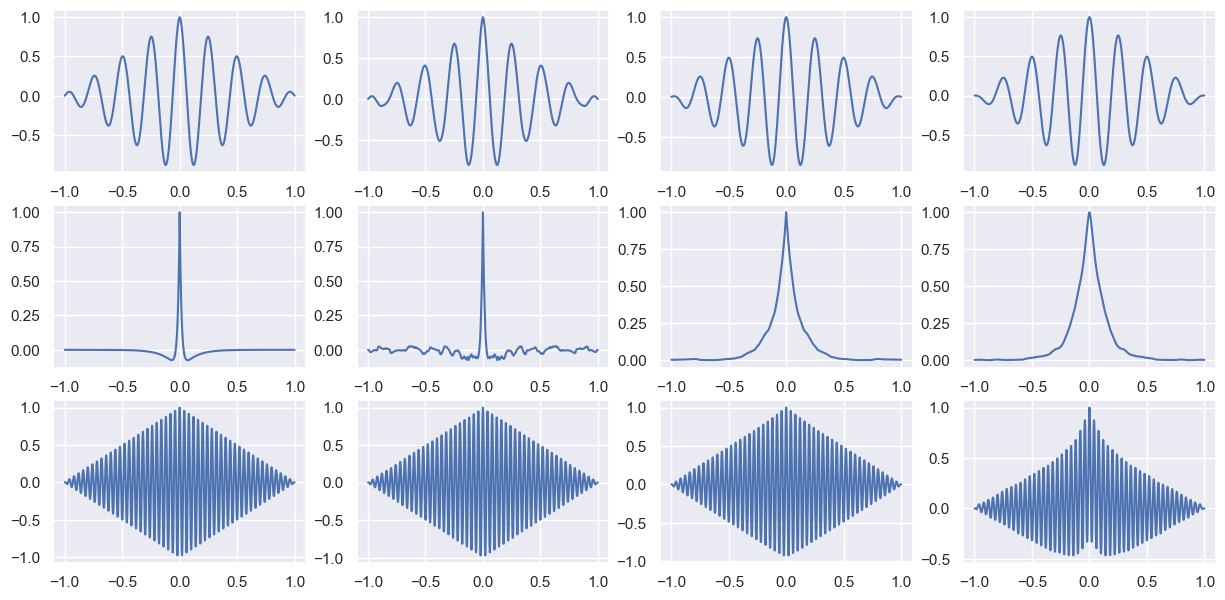

In [29]:
#6 Autocorrelation Function python
lags = arange(-800 + 1,800)
#self corr

acf_c6 = correlate(clear_h6.y[1], clear_h6.y[1], mode='full')
acf_c6 /= max(acf_c6) 
acf_6 = correlate(sol_h6.y[1], sol_h6.y[1], mode='full')
acf_6 /= max(acf_6) 
acf_w6 = correlate(sol_h_g6.y[1], sol_h_g6.y[1], mode='full')
acf_w6 /= max(acf_w6)
acf_p6 = correlate(sol_h_p6.y[1], sol_h_p6.y[1], mode='full')
acf_p6 /=max(acf_p6)


dacf_c6 = correlate(clear_d6.y[1], clear_d6.y[1], mode='full')
dacf_c6 /= max(dacf_c6) 
dacf_6 = correlate(sol_d6.y[1], sol_d6.y[1], mode='full')
dacf_6 /= max(dacf_6) 
dacf_w6 = correlate(sol_d_g6.y[1], sol_d_g6.y[1], mode='full')
dacf_w6 /= max(dacf_w6)
dacf_p6 = correlate(sol_d_p6.y[1], sol_d_p6.y[1], mode='full')
dacf_p6 /=max(dacf_p6)

racf_c6 = correlate(clear_dr6.y[1], clear_dr6.y[1], mode='full')
racf_c6 /= max(racf_c6) 
racf_6 = correlate(sol_dr6.y[1], sol_dr6.y[1], mode='full')
racf_6 /= max(racf_6) 
racf_w6 = correlate(sol_dr_g6.y[1], sol_dr_g6.y[1], mode='full')
racf_w6 /= max(racf_w6)
racf_p6 = correlate(sol_dr_p6.y[1], sol_dr_p6.y[1], mode='full')
racf_p6 /=max(racf_p6)



fig = plt.figure(figsize = (15,30))

ax = fig.add_subplot(12,4,1)
plot(lags / 800, acf_c6)

ax = fig.add_subplot(12,4,2)
plot(lags / 800, acf_6)

ax = fig.add_subplot(12,4,3)
plot(lags / 800, acf_w6)

ax = fig.add_subplot(12,4,4)
plot(lags / 800, acf_p6)

ax = fig.add_subplot(12,4,5)
plot(lags / 800, dacf_c6)

ax = fig.add_subplot(12,4,6)
plot(lags / 800, dacf_6)

ax = fig.add_subplot(12,4,7)
plot(lags / 800, dacf_w6)

ax = fig.add_subplot(12,4,8)
plot(lags / 800, dacf_p6)

ax = fig.add_subplot(12,4,9)
plot(lags / 800, racf_c6)

ax = fig.add_subplot(12,4,10)
plot(lags / 800, racf_6)

ax = fig.add_subplot(12,4,11)
plot(lags / 800, racf_w6)

ax = fig.add_subplot(12,4,12)
plot(lags / 800, racf_p6)

plt.savefig('pics/autocorr_2.png', dpi=900, bbox_inches = 'tight',
    pad_inches = 1)

#plt.xlabel('Time Lag (s)')
#plt.ylabel('Autocorrelation')
#plt.title('Autocorrelation Function (ACF)')


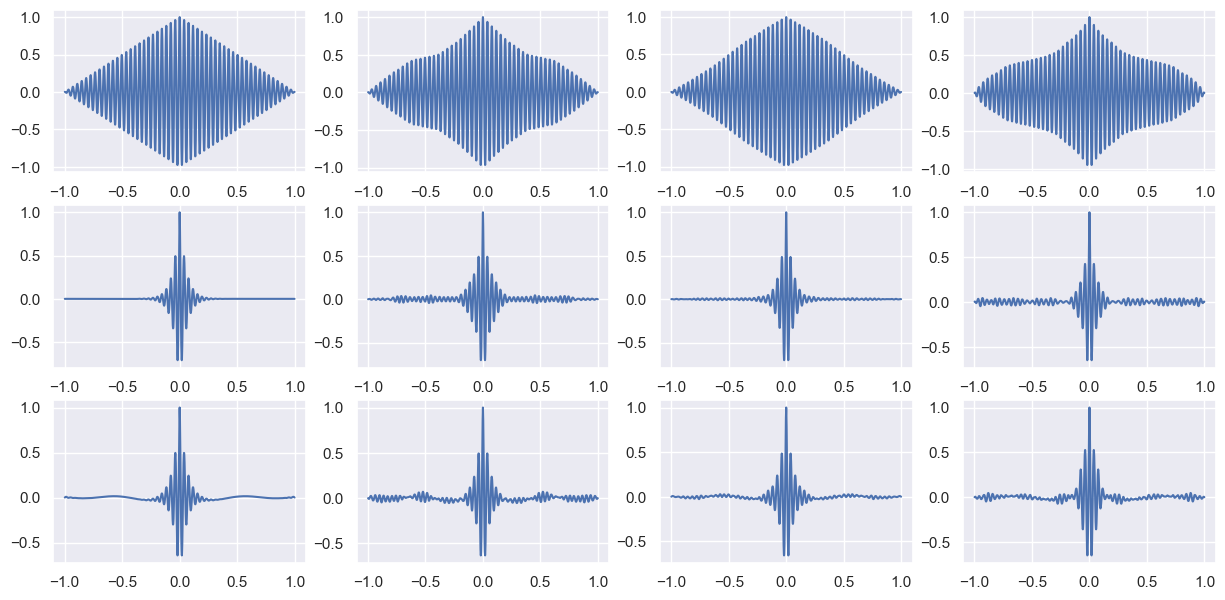

In [30]:
#6 Autocorrelation Function python
lags = arange(-800 + 1,800)
#self corr

acf_c7 = correlate(clear_h7.y[1], clear_h7.y[1], mode='full')
acf_c7 /= max(acf_c7) 
acf_7 = correlate(sol_h7.y[1], sol_h7.y[1], mode='full')
acf_7 /= max(acf_7) 
acf_w7 = correlate(sol_h_g7.y[1], sol_h_g7.y[1], mode='full')
acf_w7 /= max(acf_w7)
acf_p7 = correlate(sol_h_p7.y[1], sol_h_p7.y[1], mode='full')
acf_p7 /=max(acf_p7)


dacf_c7 = correlate(clear_d7.y[1], clear_d7.y[1], mode='full')
dacf_c7 /= max(dacf_c7) 
dacf_7 = correlate(sol_d7.y[1], sol_d7.y[1], mode='full')
dacf_7 /= max(dacf_7) 
dacf_w7 = correlate(sol_d_g7.y[1], sol_d_g7.y[1], mode='full')
dacf_w7 /= max(dacf_w7)
dacf_p7 = correlate(sol_d_p7.y[1], sol_d_p7.y[1], mode='full')
dacf_p7 /=max(dacf_p7)

racf_c7 = correlate(clear_dr7.y[1], clear_dr7.y[1], mode='full')
racf_c7 /= max(racf_c7) 
racf_7 = correlate(sol_dr7.y[1], sol_dr7.y[1], mode='full')
racf_7 /= max(racf_7) 
racf_w7 = correlate(sol_dr_g7.y[1], sol_dr_g7.y[1], mode='full')
racf_w7 /= max(racf_w7)
racf_p7 = correlate(sol_dr_p7.y[1], sol_dr_p7.y[1], mode='full')
racf_p7 /=max(racf_p7)



fig = plt.figure(figsize = (15,30))

ax = fig.add_subplot(12,4,1)
plot(lags / 800, acf_c7)

ax = fig.add_subplot(12,4,2)
plot(lags / 800, acf_7)

ax = fig.add_subplot(12,4,3)
plot(lags / 800, acf_w7)

ax = fig.add_subplot(12,4,4)
plot(lags / 800, acf_p7)

ax = fig.add_subplot(12,4,5)
plot(lags / 800, dacf_c7)

ax = fig.add_subplot(12,4,6)
plot(lags / 800, dacf_7)

ax = fig.add_subplot(12,4,7)
plot(lags / 800, dacf_w7)

ax = fig.add_subplot(12,4,8)
plot(lags / 800, dacf_p7)

ax = fig.add_subplot(12,4,9)
plot(lags / 800, racf_c7)

ax = fig.add_subplot(12,4,10)
plot(lags / 800, racf_7)

ax = fig.add_subplot(12,4,11)
plot(lags / 800, racf_w7)

ax = fig.add_subplot(12,4,12)
plot(lags / 800, racf_p7)

plt.savefig('pics/autocorr_3.png', dpi=900, bbox_inches = 'tight',
    pad_inches = 1)

#plt.xlabel('Time Lag (s)')
#plt.ylabel('Autocorrelation')
#plt.title('Autocorrelation Function (ACF)')


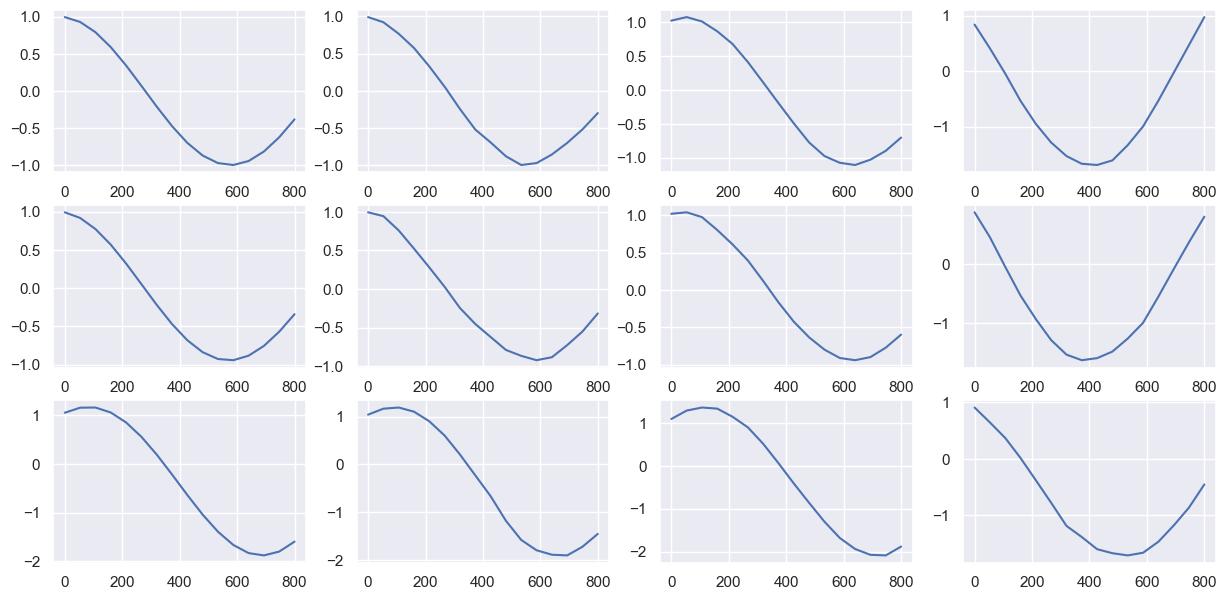

In [31]:
#7 time avg
def time_avg(signal):
    window_size = 3
    num_windows = int(signal.t[-1]-signal.t[0]) // window_size
    avgs = []

    for i in range(num_windows):
        window_start = i * window_size
        window_end = (i + 1) * window_size
        window_data = signal.y[1][window_start:window_end]
        window_average = np.mean(window_data)
        avgs.append(window_average)
    avg_t = np.linspace(0, 800, num_windows)
    return avg_t, avgs

cavg_t5, cavgs5= time_avg(clear_h5)
avg_t5, avgs5= time_avg(sol_h5)
avg_tg5, avgsg5= time_avg(sol_h_g5)
avg_tp5, avgsp5= time_avg(sol_h_p5)

cdavg_t5, dcavgs5= time_avg(clear_d5)
davg_t5, davgs5= time_avg(sol_d5)
davg_tg5, davgsg5= time_avg(sol_d_g5)
davg_tp5, davgsp5= time_avg(sol_d_p5)

cravg_t5, rcavgs5= time_avg(clear_dr5)
ravg_t5, ravgs5= time_avg(sol_dr5)
ravg_tg5, ravgsg5= time_avg(sol_dr_g5)
ravg_tp5, ravgsp5= time_avg(sol_dr_p5)



fig = plt.figure(figsize = (15,30))

ax = fig.add_subplot(12,4,1)
plot(cavg_t5, cavgs5)
ax = fig.add_subplot(12,4,2)
plot(avg_t5, avgs5)
ax = fig.add_subplot(12,4,3)
plot(avg_tg5, avgsg5)
ax = fig.add_subplot(12,4,4)
plot(avg_tp5, avgsp5)

ax = fig.add_subplot(12,4,5)
plot(cdavg_t5, dcavgs5)
ax = fig.add_subplot(12,4,6)
plot(davg_t5, davgs5)
ax = fig.add_subplot(12,4,7)
plot(davg_tg5, davgsg5)
ax = fig.add_subplot(12,4,8)
plot(davg_tp5, davgsp5)

ax = fig.add_subplot(12,4,9)
plot(cravg_t5, rcavgs5)
ax = fig.add_subplot(12,4,10)
plot(ravg_t5, ravgs5)
ax = fig.add_subplot(12,4,11)
plot(ravg_tg5, ravgsg5)
ax = fig.add_subplot(12,4,12)
plot(ravg_tp5, ravgsp5)

plt.savefig('pics/time_avg_sig_1.png', dpi=900, bbox_inches = 'tight',
    pad_inches = 1)

#plt.plot(averaged_t, averages)
#plt.xlabel('Time (s)')
#plt.ylabel('Average Amplitude')
#plt.title('Time-Averaged Signal')

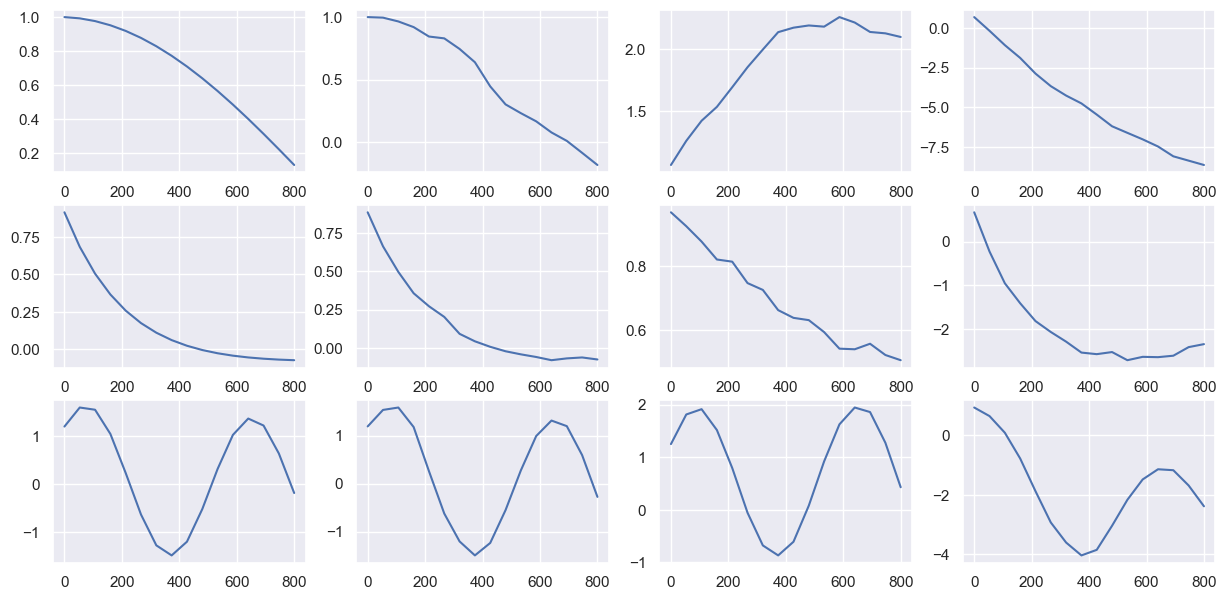

In [32]:

cavg_t6, cavgs6= time_avg(clear_h6)
avg_t6, avgs6= time_avg(sol_h6)
avg_tg6, avgsg6= time_avg(sol_h_g6)
avg_tp6, avgsp6= time_avg(sol_h_p6)

cdavg_t6, dcavgs6= time_avg(clear_d6)
davg_t6, davgs6= time_avg(sol_d6)
davg_tg6, davgsg6= time_avg(sol_d_g6)
davg_tp6, davgsp6= time_avg(sol_d_p6)

cravg_t6, rcavgs6= time_avg(clear_dr6)
ravg_t6, ravgs6= time_avg(sol_dr6)
ravg_tg6, ravgsg6= time_avg(sol_dr_g6)
ravg_tp6, ravgsp6= time_avg(sol_dr_p6)



fig = plt.figure(figsize = (15,30))

ax = fig.add_subplot(12,4,1)
plot(cavg_t6, cavgs6)
ax = fig.add_subplot(12,4,2)
plot(avg_t6, avgs6)
ax = fig.add_subplot(12,4,3)
plot(avg_tg6, avgsg6)
ax = fig.add_subplot(12,4,4)
plot(avg_tp6, avgsp6)

ax = fig.add_subplot(12,4,5)
plot(cdavg_t6, dcavgs6)
ax = fig.add_subplot(12,4,6)
plot(davg_t6, davgs6)
ax = fig.add_subplot(12,4,7)
plot(davg_tg6, davgsg6)
ax = fig.add_subplot(12,4,8)
plot(davg_tp6, davgsp6)

ax = fig.add_subplot(12,4,9)
plot(cravg_t6, rcavgs6)
ax = fig.add_subplot(12,4,10)
plot(ravg_t6, ravgs6)
ax = fig.add_subplot(12,4,11)
plot(ravg_tg6, ravgsg6)
ax = fig.add_subplot(12,4,12)
plot(ravg_tp6, ravgsp6)

plt.savefig('pics/time_avg_sig_2.png', dpi=900, bbox_inches = 'tight',
    pad_inches = 1)
#plt.plot(averaged_t, averages)
#plt.xlabel('Time (s)')
#plt.ylabel('Average Amplitude')
#plt.title('Time-Averaged Signal')


In [33]:
cavg_t7, cavgs7= time_avg(clear_h7)
avg_t7, avgs7= time_avg(sol_h7)
avg_tg7, avgsg7= time_avg(sol_h_g7)
avg_tp7, avgsp7= time_avg(sol_h_p7)

cdavg_t7, dcavgs7= time_avg(clear_d7)
davg_t7, davgs7= time_avg(sol_d7)
davg_tg7, davgsg7= time_avg(sol_d_g7)
davg_tp7, davgsp7= time_avg(sol_d_p7)

cravg_t7, rcavgs7= time_avg(clear_dr7)
ravg_t7, ravgs7= time_avg(sol_dr7)
ravg_tg7, ravgsg7= time_avg(sol_dr_g7)
ravg_tp7, ravgsp7= time_avg(sol_dr_p7)



fig = plt.figure(figsize = (15,30))

ax = fig.add_subplot(12,4,1)
plot(cavg_t7, cavgs7)
ax = fig.add_subplot(12,4,2)
plot(avg_t7, avgs7)
ax = fig.add_subplot(12,4,3)
plot(avg_tg7, avgsg7)
ax = fig.add_subplot(12,4,4)
plot(avg_tp7, avgsp7)

ax = fig.add_subplot(12,4,5)
plot(cdavg_t7, dcavgs7)
ax = fig.add_subplot(12,4,6)
plot(davg_t7, davgs7)
ax = fig.add_subplot(12,4,7)
plot(davg_tg7, davgsg7)
ax = fig.add_subplot(12,4,8)
plot(davg_tp7, davgsp7)

ax = fig.add_subplot(12,4,9)
plot(cravg_t7, rcavgs7)
ax = fig.add_subplot(12,4,10)
plot(ravg_t7, ravgs7)
ax = fig.add_subplot(12,4,11)
plot(ravg_tg7, ravgsg7)
ax = fig.add_subplot(12,4,12)
plot(ravg_tp7, ravgsp7)

#fig.suptitle(' Time-Averaged Signal for Oscillator 3')
#fig.suptitle('Time (s)')
#fig.suptitle('Average Amplitude')
#extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
plt.savefig('pics/time_avg_sig_3.png', dpi=900, bbox_inches = 'tight',
    pad_inches = 1)
#plt.plot(averaged_t, averages)
#plt.xlabel('Time (s)')
#plt.ylabel('Average Amplitude')
#plt.title('Time-Averaged Signal')


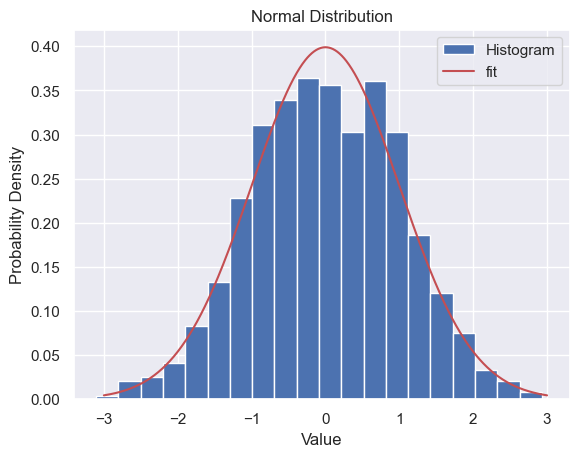

In [111]:

from scipy.stats import norm
# Generate random numbers from a normal distribution

normal_data = np.random.normal(0,1,800)

# Plot a histogram and probability density function (PDF)
plt.hist(normal_data, bins=20, density=True, label='Histogram')
x = np.linspace(-3, 3, 800)
pdf = norm.pdf(x, mu, sigma)
plt.plot(x, pdf, 'r-', label='fit')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Normal Distribution')
plt.legend()
plt.savefig('pics/normal_dis.png', dpi=900, bbox_inches = 'tight',
    pad_inches = 1)
plt.show()


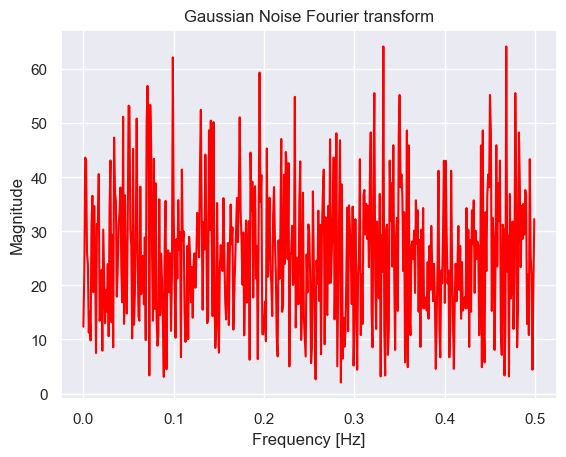

In [127]:
spectrum = np.fft.fft(normal_data)
freq = np.fft.fftfreq(1000)

# Consider only positive frequencies
positive_freq = freq[:1000 // 2]
positive_spectrum = spectrum[:1000 // 2]

#plot(pink_noise)
plot(positive_freq, np.abs(positive_spectrum), c='red')
#xlim(0,0.5)
#ylim(-2,30)
plt.ylabel('Magnitude')
plt.xlabel('Frequency [Hz]')
plt.title('Gaussian Noise Fourier transform')
plt.savefig('pics/normal_dis_fft.png', dpi=900, bbox_inches = 'tight',
    pad_inches = 1)

In [119]:
uniform_data = np.random.uniform(0, 1, 800)

# Plot a histogram to visualize the uniform distribution
plt.hist(uniform_data, bins=20, density=True)
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Uniform Distribution')
plt.savefig('pics/uni_dis.png', dpi=900, bbox_inches = 'tight',
    pad_inches = 1)
plt.show()


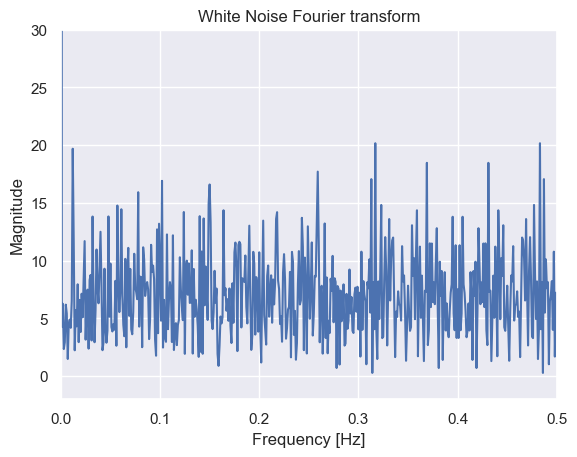

In [126]:
spectrum = np.fft.fft(uniform_data)
freq = np.fft.fftfreq(1000)

# Consider only positive frequencies
positive_freq = freq[:1000 // 2]
positive_spectrum = spectrum[:1000 // 2]

#plot(pink_noise)
plot(positive_freq, np.abs(positive_spectrum))
xlim(0,0.5)
ylim(-2,30)
plt.ylabel('Magnitude')
plt.xlabel('Frequency [Hz]')
plt.title('White Noise Fourier transform')
plt.savefig('pics/uni_fft.png', dpi=900, bbox_inches = 'tight',
    pad_inches = 1)

In [122]:
def pink():
    coef1 = [0.09922035, -0.095993537, 0.050612699, -0.004408786]
    coef2 = [1, -2.494956002, 2.017265875, -0.522189400]

    pink_noise = np.random.uniform(0,1,1000)
    pink_noise = np.convolve(pink_noise, coef1)
    pink_noise = np.convolve(pink_noise, coef2, mode='valid')
    return pink_noise / 0.091420942

pink_noise = pink()

# Compute the frequency spectrum using FFT
spectrum = np.fft.fft(pink_noise)
freq = np.fft.fftfreq(1000)

# Consider only positive frequencies
positive_freq = freq[:1000 // 2]
positive_spectrum = spectrum[:1000 // 2]

#plot(pink_noise)
plot(positive_freq, np.abs(positive_spectrum))

plt.ylabel('Magnitude')
plt.xlabel('Frequency [Hz]')
plt.title('Pink Noise Fourier transform')
plt.savefig('pics/pink_fft.png', dpi=900, bbox_inches = 'tight',
    pad_inches = 1)
